<a href="https://colab.research.google.com/github/7hsnz/Machine-Learning-Project/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Final Project**

Team members:
1. Pham Gia Khiem - 551026 (Vietnam)
2. Mohammed Hassan – 541140 (Bangladesh)
3. Fazlur Rahman - 541927 (Bangladesh)

# I. UNDERSTANDING THE DATASET

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA
import shap

In [7]:
df = pd.read_csv('/content/final_project_dataset_complete.csv')
df

NameError: name 'pd' is not defined

In [9]:
df.head()

NameError: name 'df' is not defined

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature_1   9000 non-null   float64
 1   feature_2   9000 non-null   float64
 2   feature_3   8600 non-null   float64
 3   feature_4   9000 non-null   float64
 4   feature_5   9000 non-null   float64
 5   feature_6   8500 non-null   float64
 6   feature_7   9000 non-null   float64
 7   feature_8   9000 non-null   float64
 8   category_1  9000 non-null   object 
 9   category_2  9000 non-null   object 
 10  target      9000 non-null   int64  
dtypes: float64(8), int64(1), object(2)
memory usage: 773.6+ KB


In [ ]:
df.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,target
count,9000.000000,9000.000000,8600.000000,9000.000000,9000.000000,8500.000000,9000.000000,9000.000000,9000.000000
mean,0.000427,0.003349,0.003235,-0.008481,-0.002177,-0.006447,0.000592,0.003348,0.475444
std,1.241318,2.508324,1.542901,2.061784,0.577415,1.981615,1.075064,2.043643,0.499424
min,-18.665400,-37.852816,-6.676680,-8.190124,-0.999791,-8.590782,-4.422265,-9.474989,0.000000
25%,-0.680062,-1.382610,-1.022085,-1.399928,-0.502614,-1.329040,-0.700078,-1.356620,0.000000
50%,-0.003938,-0.016698,0.005196,-0.019541,0.001695,-0.003137,-0.000097,-0.007584,0.000000
75%,0.680513,1.380228,1.038571,1.394151,0.497004,1.324897,0.731942,1.402024,1.000000
max,21.934496,47.603454,6.203055,8.189001,0.999914,6.803751,3.857219,7.572578,1.000000


In [ ]:
numerical_features = df.select_dtypes(include=['float64','int64'])

In [ ]:
numerical_features

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,target
0,0.496714,1.146509,-0.648521,0.833005,0.784920,-2.209437,-1.300105,-2.242241,1
1,-0.138264,-0.061846,NaN,0.403768,0.704674,-2.498565,-1.339227,-1.942298,0
2,0.647689,1.395115,-0.764126,1.708266,-0.250029,1.956259,1.190238,1.503559,1
3,1.523030,2.657560,-2.461653,2.649051,0.882201,3.445638,2.120913,3.409035,1
4,-0.234153,-0.499391,0.576097,-0.441656,0.610601,0.211425,0.935759,-0.401463,0
...,...,...,...,...,...,...,...,...,...
8995,0.101630,0.400250,NaN,-0.019412,-0.063150,0.077627,0.540975,-0.169030,0
8996,1.167218,2.177774,-1.716067,1.994835,0.350043,-0.544915,0.089050,-0.944220,1
8997,1.588447,3.333945,-2.615488,3.476880,-0.933276,2.027658,0.239583,1.951491,1
8998,-0.684987,-1.599835,1.063341,-1.252109,-0.724001,2.228943,0.989794,1.936476,0


In [ ]:
numerical_features.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,target
0,0.496714,1.146509,-0.648521,0.833005,0.784920,-2.209437,-1.300105,-2.242241,1
1,-0.138264,-0.061846,NaN,0.403768,0.704674,-2.498565,-1.339227,-1.942298,0
2,0.647689,1.395115,-0.764126,1.708266,-0.250029,1.956259,1.190238,1.503559,1
3,1.523030,2.657560,-2.461653,2.649051,0.882201,3.445638,2.120913,3.409035,1
4,-0.234153,-0.499391,0.576097,-0.441656,0.610601,0.211425,0.935759,-0.401463,0


In [ ]:
categorical_features = df.select_dtypes(include=['object'])

In [ ]:
categorical_features.head()

,category_1,category_2
0,Above Average,Region C
1,Below Average,Region A
2,High,Region C
3,High,Region B
4,Below Average,Region C


In [ ]:
numerical_corr = numerical_features.corr()

In [ ]:
#Correlation Matrix
numerical_corr

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,target
feature_1,1.000000,0.995360,-0.831705,0.831922,-0.015305,-0.010813,-0.010843,-0.004581,0.605940
feature_2,0.995360,1.000000,-0.823242,0.832002,-0.014715,-0.011519,-0.011393,-0.005394,0.606016
feature_3,-0.831705,-0.823242,1.000000,-0.957222,0.011309,0.003989,0.006042,0.001846,-0.704351
feature_4,0.831922,0.832002,-0.957222,1.000000,-0.003613,-0.000213,-0.001369,0.001202,0.694885
feature_5,-0.015305,-0.014715,0.011309,-0.003613,1.000000,-0.009365,0.252371,-0.012717,-0.007873
feature_6,-0.010813,-0.011519,0.003989,-0.000213,-0.009365,1.000000,0.921569,0.969998,0.001457
feature_7,-0.010843,-0.011393,0.006042,-0.001369,0.252371,0.921569,1.000000,0.894220,-0.002000
feature_8,-0.004581,-0.005394,0.001846,0.001202,-0.012717,0.969998,0.894220,1.000000,0.004658
target,0.605940,0.606016,-0.704351,0.694885,-0.007873,0.001457,-0.002000,0.004658,1.000000


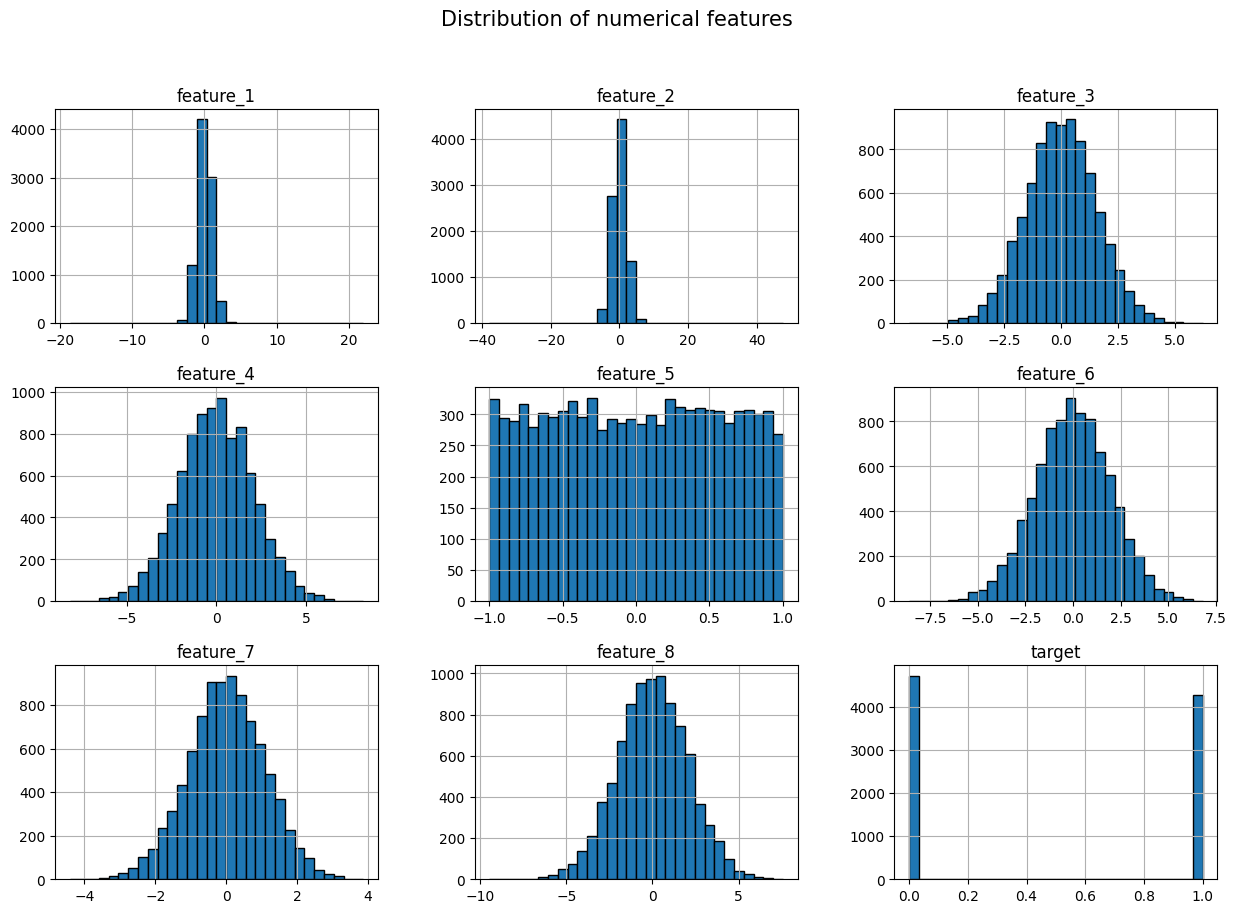

In [ ]:
#Historgram of distribution of numerical features
df.hist(bins=30, figsize=(15,10), edgecolor = 'black')
plt.suptitle("Distribution of numerical features", fontsize = 15)
plt.show()

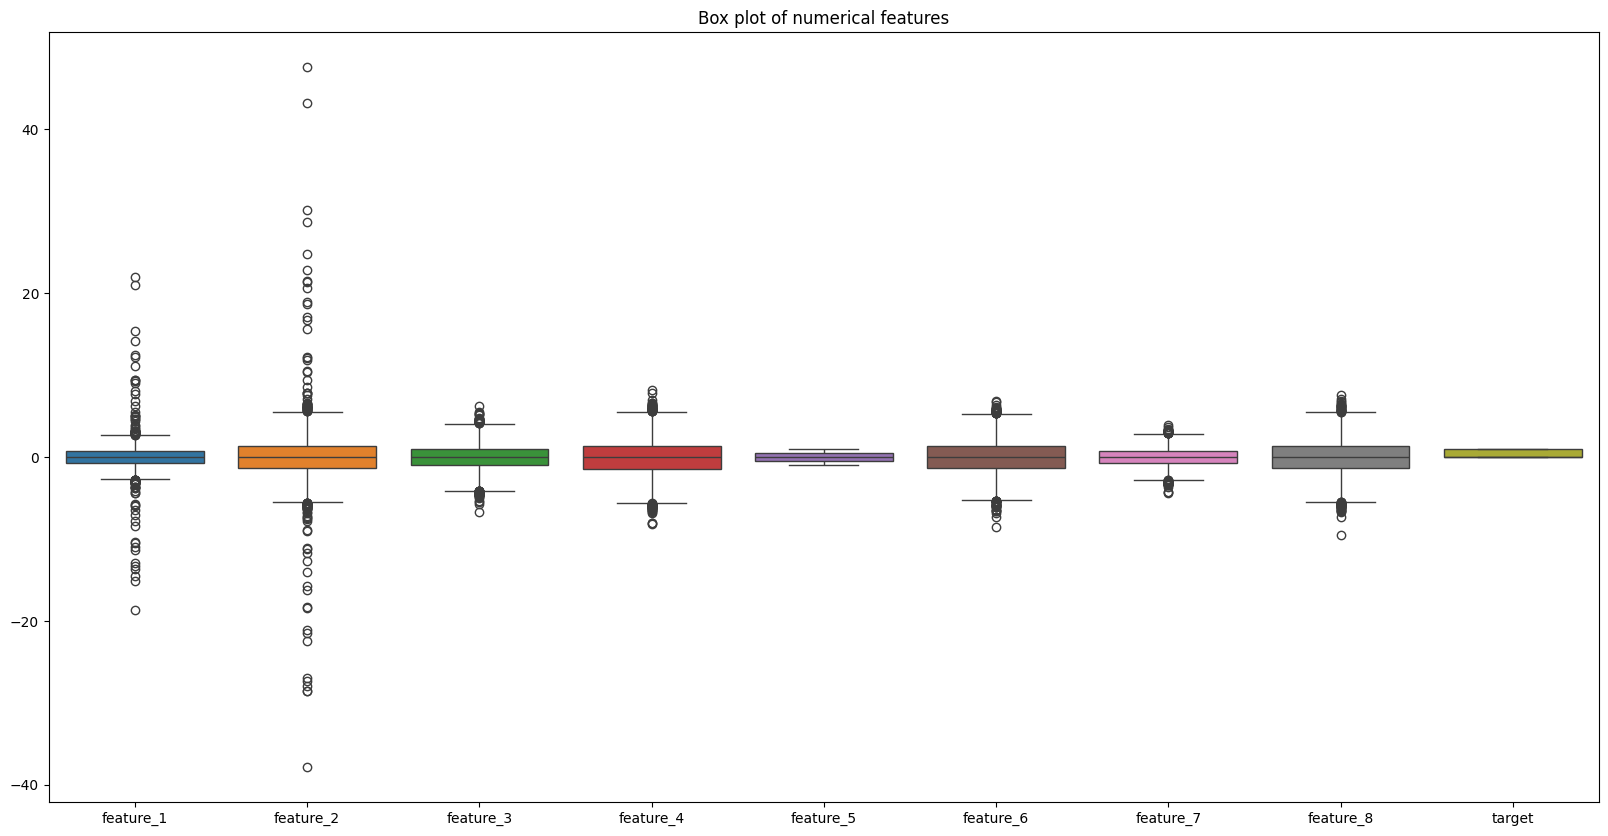

In [ ]:
#Box plot of distribution of numerical features
plt.figure(figsize=(20,10))
sns.boxplot(data=numerical_features)
plt.title('Box plot of numerical features')
plt.show()

<Figure size 2000x1000 with 0 Axes>

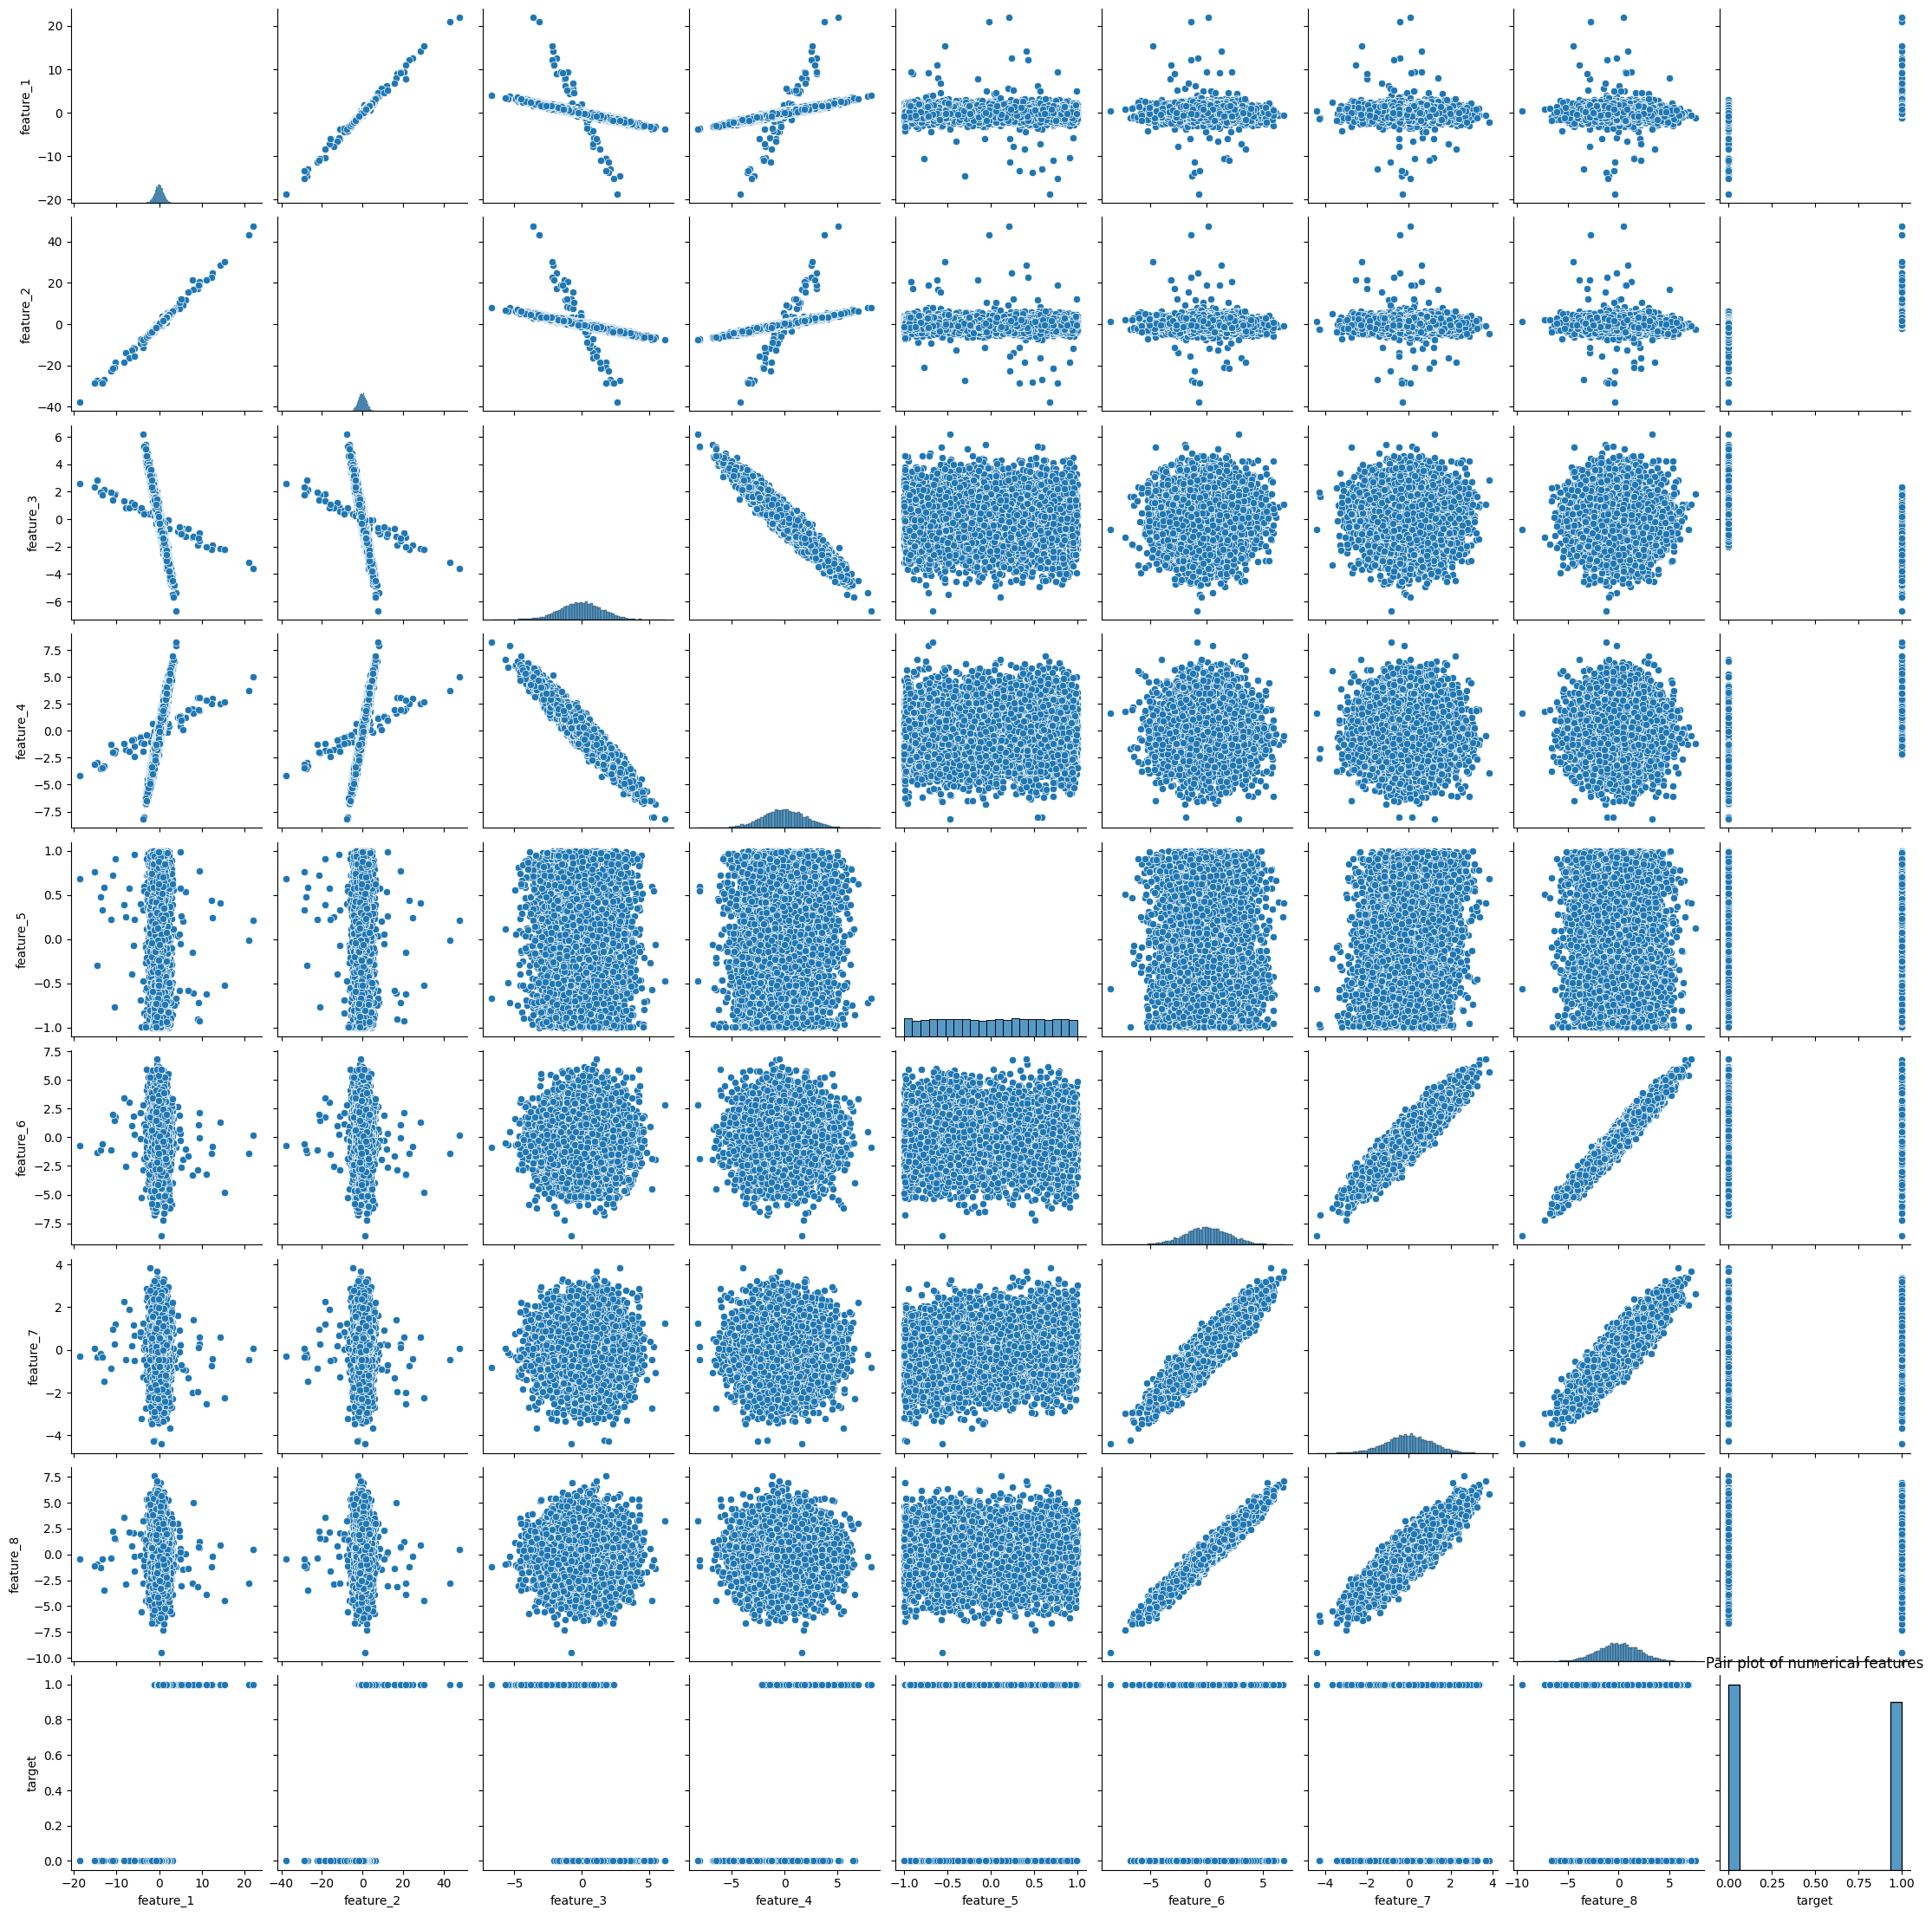

In [ ]:
plt.figure(figsize=(20,10))
sns.pairplot(df, hue=None)
plt.title('Pair plot of numerical features')
plt.show()

# II. DATA PREPROCESSING


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isna().sum()

,0
feature_1,0
feature_2,0
feature_3,400
feature_4,0
feature_5,0
feature_6,500
feature_7,0
feature_8,0
category_1,0
category_2,0


In [ ]:
missing_values = df.isna().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)

feature_3    400
feature_6    500
dtype: int64


In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
df['feature_3'] = imputer.fit_transform(df[['feature_3']])
df['feature_6'] = imputer.fit_transform(df[['feature_6']])

In [ ]:
df['feature_3'].isna().sum()
df['feature_6'].isna().sum()

np.int64(0)

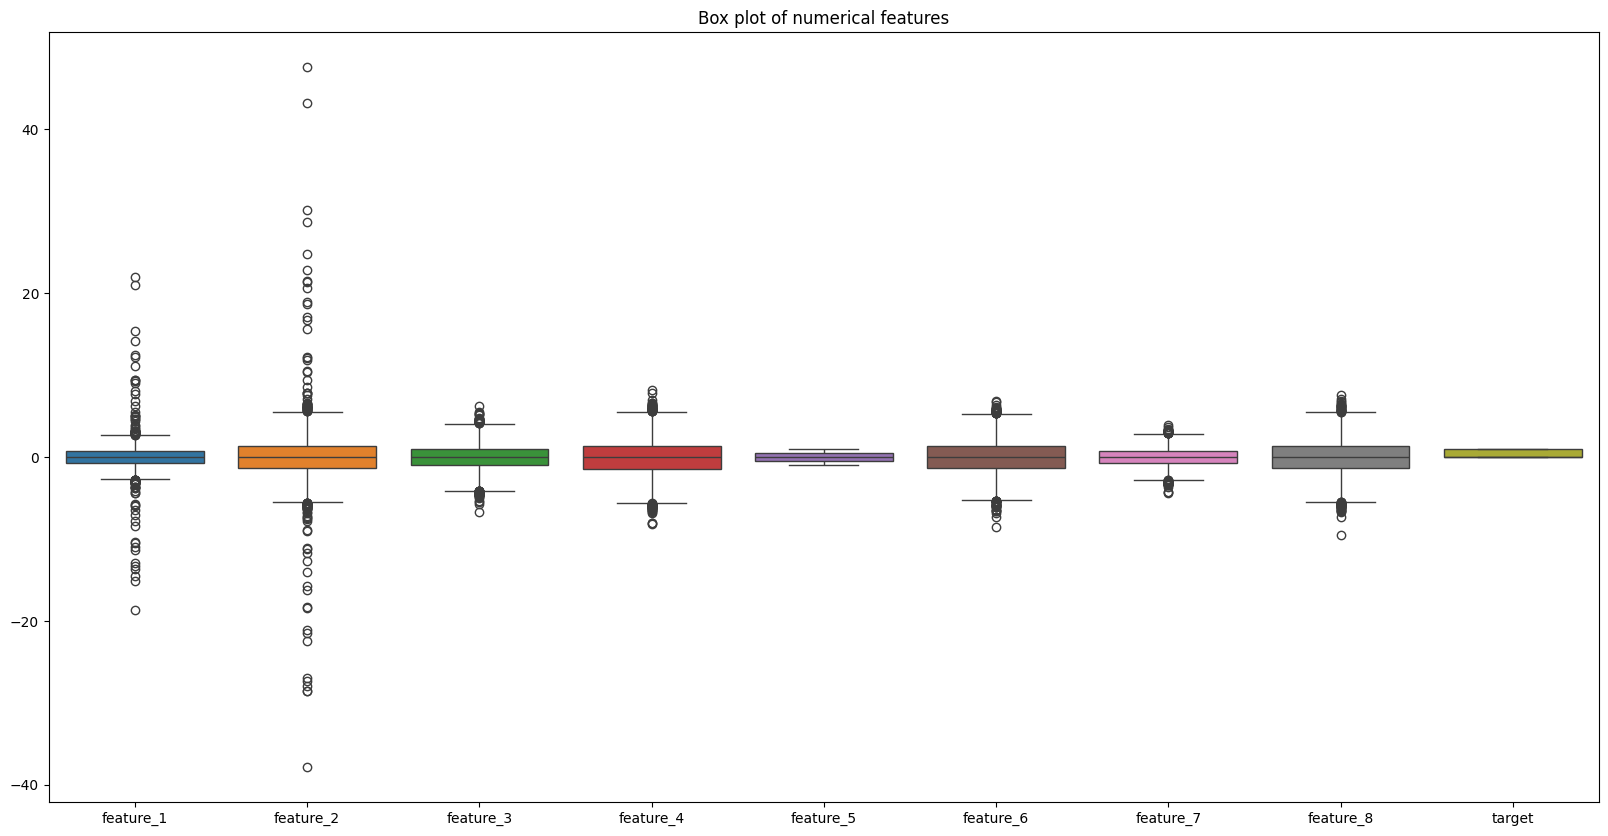

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Box plot of numerical features')
sns.boxplot(data=numerical_features)
plt.show()

In [ ]:
def iqr_outliers(dataset, feature_name, multiplier= 1.5):
    # Calculate IQR
    Q1 = dataset[feature_name].quantile(0.25)
    Q3 = dataset[feature_name].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate limits
    lower_limit = Q1 - multiplier * IQR
    upper_limit = Q3 + multiplier * IQR

    # Identify outliers
    outliers = dataset[(dataset[feature_name] < lower_limit) | (dataset[feature_name] > upper_limit)]

    return outliers, {'lower_limit': lower_limit, 'upper_limit': upper_limit}

outliers_detected = {}

for feature in numerical_features.columns:
    outliers, limits = iqr_outliers(numerical_features, feature)
    outliers_detected[feature] = {
        'count': len(outliers),
        'indices': outliers.index.tolist(),
        'limits': limits
    }

    print(f'Feature: {feature}')
    print(f'Number of outliers: {len(outliers)}')
    print(f'Lower limit: {limits["lower_limit"]}, Upper limit: {limits["upper_limit"]}')
    print(f'Outlier indices: {outliers.index.tolist()}')
    print('-' * 50)

Feature: feature_1
Number of outliers: 113
Lower limit: -2.7209235765, Upper limit: 2.7213741995
Outlier indices: [209, 262, 277, 469, 478, 496, 598, 774, 1061, 1101, 1400, 1445, 1539, 1591, 1615, 1785, 1957, 1971, 2024, 2035, 2093, 2218, 2228, 2305, 2336, 2442, 2458, 2506, 2521, 2884, 2895, 2947, 3017, 3152, 3227, 3241, 3245, 3336, 3454, 3510, 3569, 3716, 3872, 3982, 3986, 4026, 4029, 4033, 4047, 4091, 4198, 4207, 4265, 4359, 4531, 4617, 4635, 4639, 4725, 4779, 4784, 4870, 4997, 5157, 5224, 5316, 5416, 5488, 5587, 5642, 5649, 5673, 5773, 5796, 5846, 5907, 5935, 5998, 6350, 6408, 6628, 6693, 6738, 6747, 6891, 7060, 7140, 7178, 7223, 7290, 7305, 7330, 7441, 7498, 7611, 7624, 7677, 7839, 7851, 7858, 7872, 7874, 8024, 8067, 8165, 8180, 8200, 8248, 8283, 8354, 8630, 8714, 8726]
--------------------------------------------------
Feature: feature_2
Number of outliers: 106
Lower limit: -5.5268680488749995, Upper limit: 5.524485932125
Outlier indices: [209, 262, 277, 469, 478, 496, 598, 774, 1

In [ ]:
df_1 = df.copy()
for feature, values in outliers_detected.items():
    outlier_indices = values['indices']
    # calculate the median value
    median_value = df_1[feature].median()
    # replace outliers with median values
    df_1.loc[outlier_indices, feature] = median_value

    print(f"Feature: {feature}")
    print(f"Replaced outliers in indices: {outlier_indices}")
    print('-' * 50)

Feature: feature_1
Replaced outliers in indices: [209, 262, 277, 469, 478, 496, 598, 774, 1061, 1101, 1400, 1445, 1539, 1591, 1615, 1785, 1957, 1971, 2024, 2035, 2093, 2218, 2228, 2305, 2336, 2442, 2458, 2506, 2521, 2884, 2895, 2947, 3017, 3152, 3227, 3241, 3245, 3336, 3454, 3510, 3569, 3716, 3872, 3982, 3986, 4026, 4029, 4033, 4047, 4091, 4198, 4207, 4265, 4359, 4531, 4617, 4635, 4639, 4725, 4779, 4784, 4870, 4997, 5157, 5224, 5316, 5416, 5488, 5587, 5642, 5649, 5673, 5773, 5796, 5846, 5907, 5935, 5998, 6350, 6408, 6628, 6693, 6738, 6747, 6891, 7060, 7140, 7178, 7223, 7290, 7305, 7330, 7441, 7498, 7611, 7624, 7677, 7839, 7851, 7858, 7872, 7874, 8024, 8067, 8165, 8180, 8200, 8248, 8283, 8354, 8630, 8714, 8726]
--------------------------------------------------
Feature: feature_2
Replaced outliers in indices: [209, 262, 277, 469, 478, 496, 598, 774, 1061, 1101, 1400, 1445, 1591, 1615, 1785, 1957, 1971, 2024, 2093, 2218, 2228, 2305, 2336, 2442, 2458, 2506, 2895, 2947, 3017, 3152, 3227, 3

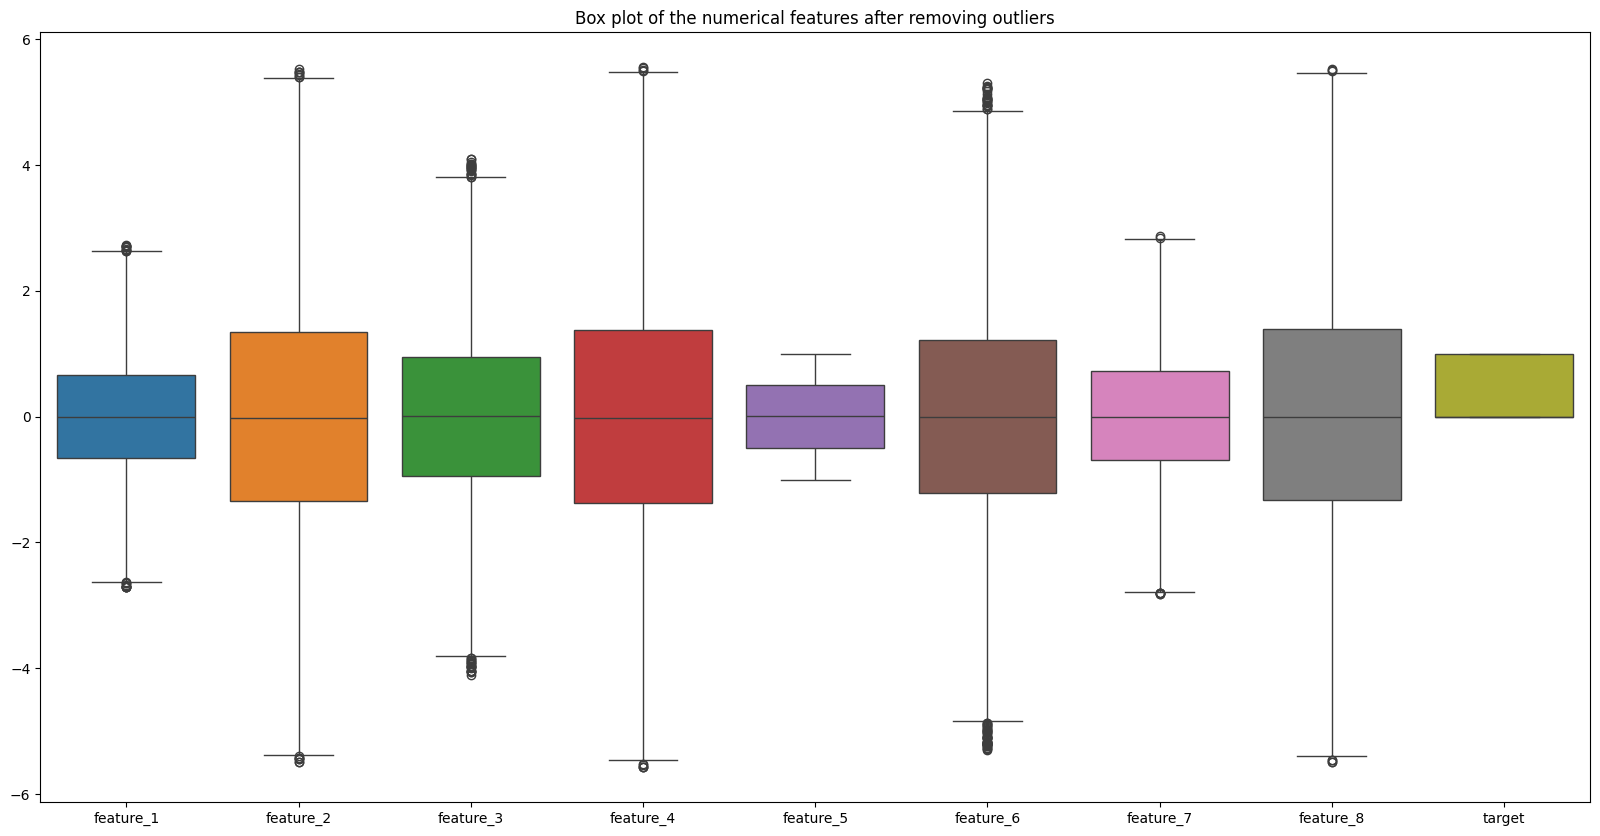

In [ ]:
plt.figure(figsize=(20, 10))
plt.title('Box plot of the numerical features after removing outliers')
sns.boxplot(data=df_1)
plt.show()

In [ ]:
df_1.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,target
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,-0.000672,0.002354,0.005962,-0.010226,-0.002177,-0.004937,0.006010,0.010578,0.475444
std,0.971927,1.959564,1.448882,1.986669,0.577415,1.865959,1.038181,1.980097,0.499424
min,-2.712613,-5.486925,-4.104379,-5.569645,-0.999791,-5.299373,-2.819977,-5.490152,0.000000
25%,-0.657194,-1.346706,-0.950363,-1.377240,-0.502614,-1.211517,-0.684357,-1.329677,0.000000
50%,-0.003938,-0.016698,0.005196,-0.019541,0.001695,-0.003137,-0.000097,-0.007584,0.000000
75%,0.659561,1.343450,0.954145,1.368650,0.497004,1.218900,0.720851,1.386503,1.000000
max,2.720169,5.516173,4.096764,5.552331,0.999914,5.293819,2.876070,5.529430,1.000000


In [ ]:
#label encoding
category_columns = df_1[['category_1', 'category_2']]
for column in category_columns:
    unique_values = df_1[column].unique()
    unique_count = df_1[column].nunique()

    print(f"Column '{column}':")
    print(f"Unique values: {unique_values}")
    print(f"Number of unique options: {unique_count}")
    print('-' * 30)

Column 'category_1':
Unique values: ['Above Average' 'Below Average' 'High' 'Low']
Number of unique options: 4
------------------------------
Column 'category_2':
Unique values: ['Region C' 'Region A' 'Region B']
Number of unique options: 3
------------------------------


In [ ]:
# Making a copy of the dataset to avoid changing the original data
df_2 = df_1.copy()

label_encoder = LabelEncoder()
df_2['cat_1_encoded'] = label_encoder.fit_transform(df_2['category_1'])
# One-Hot Encoding for category_2 (nominal)
df_one_hot = pd.get_dummies(df_2['category_2'])

# Combine the original dataframe with the one-hot encoded dataframe
df_2 = pd.concat([df_2, df_one_hot], axis=1)

# Drop the original category_2 column if no longer needed
df_2.drop(columns=['category_1', 'category_2'], inplace=True)

# Display the final dataframe
df_2.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,target,cat_1_encoded,Region A,Region B,Region C
0,0.496714,1.146509,-0.648521,0.833005,0.784920,-2.209437,-1.300105,-2.242241,1,0,False,False,True
1,-0.138264,-0.061846,0.005196,0.403768,0.704674,-2.498565,-1.339227,-1.942298,0,1,True,False,False
2,0.647689,1.395115,-0.764126,1.708266,-0.250029,1.956259,1.190238,1.503559,1,2,False,False,True
3,1.523030,2.657560,-2.461653,2.649051,0.882201,3.445638,2.120913,3.409035,1,2,False,True,False
4,-0.234153,-0.499391,0.576097,-0.441656,0.610601,0.211425,0.935759,-0.401463,0,1,False,False,True


In [ ]:
print(f'Before changing column names:\n {df_2.columns}')

# Renaming columns
df_2.rename(columns={
    'Region A': 'region_A',
    'Region B': 'region_B',
    'Region C': 'region_C'
}, inplace=True)

# Verify column names
print(f'After changing column names:\n {df_2.columns}')

Before changing column names:
 Index(['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'feature_6', 'feature_7', 'feature_8', 'target', 'cat_1_encoded',
       'Region A', 'Region B', 'Region C'],
      dtype='object')
After changing column names:
 Index(['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'feature_6', 'feature_7', 'feature_8', 'target', 'cat_1_encoded',
       'region_A', 'region_B', 'region_C'],
      dtype='object')


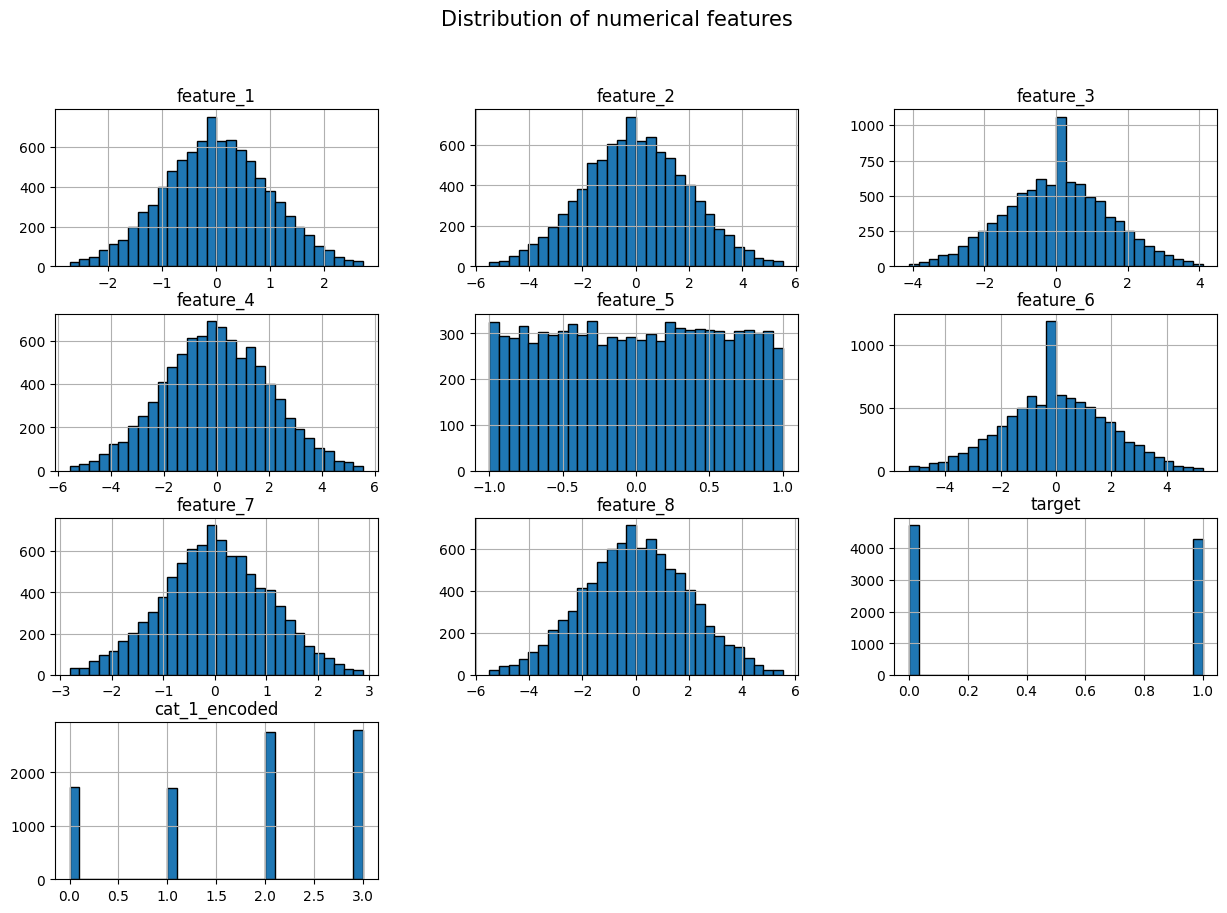

In [ ]:
df_2.hist(bins = 30, figsize=(15,10), edgecolor = 'black')
plt.suptitle("Distribution of numerical features", fontsize = 15)
plt.show()

In [ ]:
df_2.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,target,cat_1_encoded
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,-0.000672,0.002354,0.005962,-0.010226,-0.002177,-0.004937,0.006010,0.010578,0.475444,1.737778
std,0.971927,1.959564,1.448882,1.986669,0.577415,1.865959,1.038181,1.980097,0.499424,1.095463
min,-2.712613,-5.486925,-4.104379,-5.569645,-0.999791,-5.299373,-2.819977,-5.490152,0.000000,0.000000
25%,-0.657194,-1.346706,-0.950363,-1.377240,-0.502614,-1.211517,-0.684357,-1.329677,0.000000,1.000000
50%,-0.003938,-0.016698,0.005196,-0.019541,0.001695,-0.003137,-0.000097,-0.007584,0.000000,2.000000
75%,0.659561,1.343450,0.954145,1.368650,0.497004,1.218900,0.720851,1.386503,1.000000,3.000000
max,2.720169,5.516173,4.096764,5.552331,0.999914,5.293819,2.876070,5.529430,1.000000,3.000000


In [ ]:
# export cleaned dataset
df_2.to_csv('C:\depression analysis\Machine Learning\final project\cleaned_dataset.csv')

# III. EDA (EXPLORATORY DATA ANALYSIS)




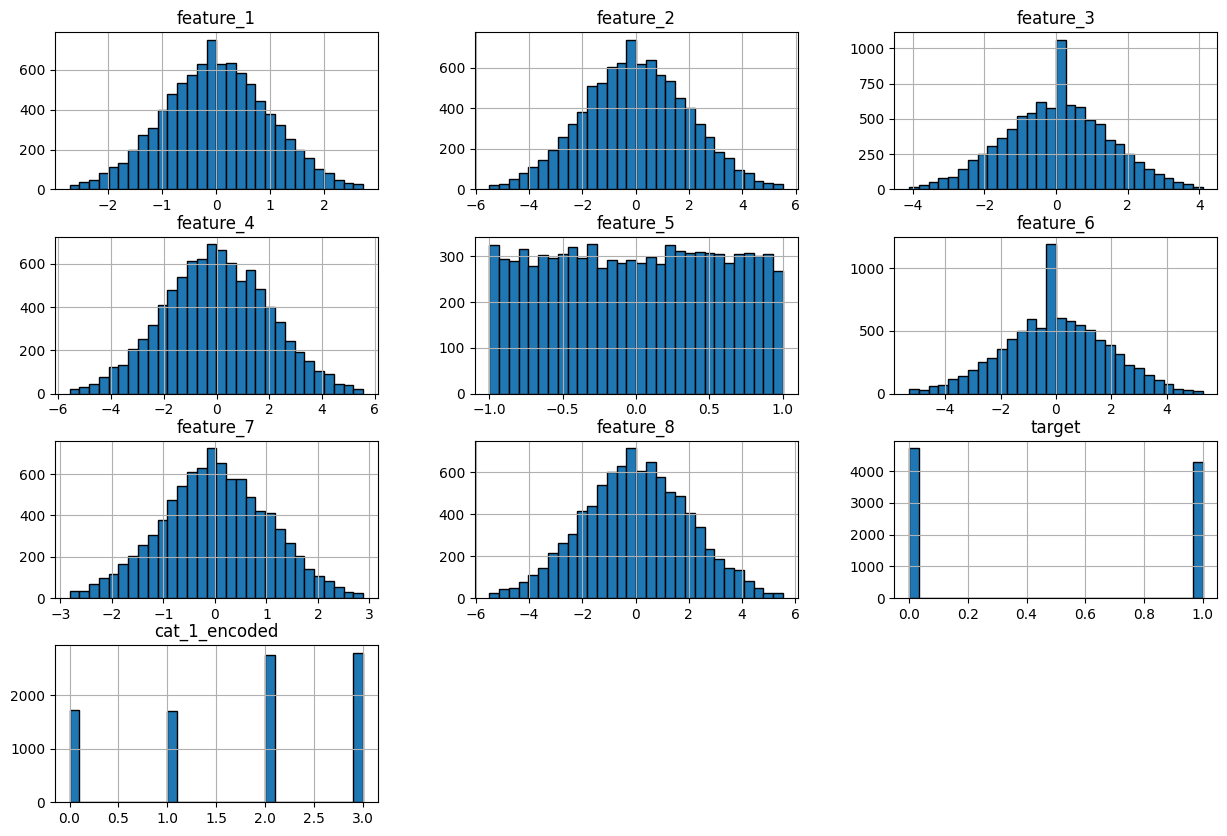

In [ ]:
df_2.hist(bins = 30, figsize=(15,10), edgecolor = 'black')
plt.show()

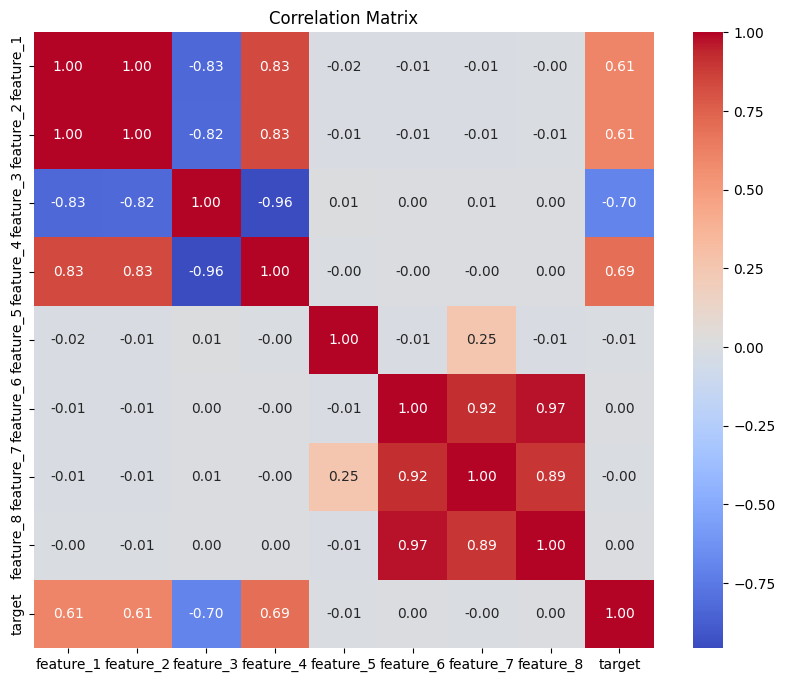

In [ ]:
# plot heatmap that visualize the correlation matrix
correlation_matrix = numerical_features.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# perform t-tests
results = {}
for feature in numerical_features[:-1]:
    group1 = df[df['target'] == 1][feature].dropna()
    group0 = df[df['target'] == 0][feature].dropna()
    t_stat, p_value = stats.ttest_ind(group1, group0)
    results[feature] = {'t_statistic': t_stat, 'p_value': p_value}
results_df = pd.DataFrame(results).T
results_df.index.name = 'Feature'
print(results_df)

           t_statistic   p_value
Feature                         
feature_1    72.253084  0.000000
feature_2    72.267409  0.000000
feature_3   -90.276861  0.000000
feature_4    91.660903  0.000000
feature_5    -0.746804  0.455201
feature_6     0.134524  0.892991
feature_7    -0.189743  0.849515
feature_8     0.441833  0.658621
target             inf  0.000000


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
# perform chi-square tests
chi_square_results = {}

contingency_table_1 = pd.crosstab(df['category_1'], df['target'])
chi2_stat_1, p_value_1, dof_1, expected_1 = stats.chi2_contingency(contingency_table_1)
chi_square_results['category_1'] = {'chi2_statistic': chi2_stat_1, 'p_value': p_value_1}

contingency_table_2 = pd.crosstab(df['category_2'], df['target'])
chi2_stat_2, p_value_2, dof_2, expected_2 = stats.chi2_contingency(contingency_table_2)
chi_square_results['category_2'] = {'chi2_statistic': chi2_stat_2, 'p_value': p_value_2}

chi_square_results_df = pd.DataFrame.from_dict(chi_square_results, orient='index')
chi_square_results_df.index.name = 'Category'

print(chi_square_results_df)

            chi2_statistic  p_value
Category                           
category_1     5175.320287  0.00000
category_2        1.319349  0.51702


# IV. FEATURE ENGINEERING

In [ ]:
df_3 = df_2.copy()
# feature engineering
def feature_engineering(df_3):
    # drop unnecessary features
    #df_3 = df_3.drop(['feature_7', 'feature_8', 'feature_5', 'feature_6', 'region_A', 'region_B', 'region_C' ], axis=1)

    # create a new feature based on existing ones
    df_3['feature_9'] = df_3['feature_1'] * df_3['feature_4']

    return df_3

df_3 = feature_engineering(df_3)

df_3.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,target,cat_1_encoded,region_A,region_B,region_C,feature_9
0,0.496714,1.146509,-0.648521,0.833005,0.784920,-2.209437,-1.300105,-2.242241,1,0,False,False,True,0.413765
1,-0.138264,-0.061846,0.005196,0.403768,0.704674,-2.498565,-1.339227,-1.942298,0,1,True,False,False,-0.055827
2,0.647689,1.395115,-0.764126,1.708266,-0.250029,1.956259,1.190238,1.503559,1,2,False,False,True,1.106424
3,1.523030,2.657560,-2.461653,2.649051,0.882201,3.445638,2.120913,3.409035,1,2,False,True,False,4.034584
4,-0.234153,-0.499391,0.576097,-0.441656,0.610601,0.211425,0.935759,-0.401463,0,1,False,False,True,0.103415


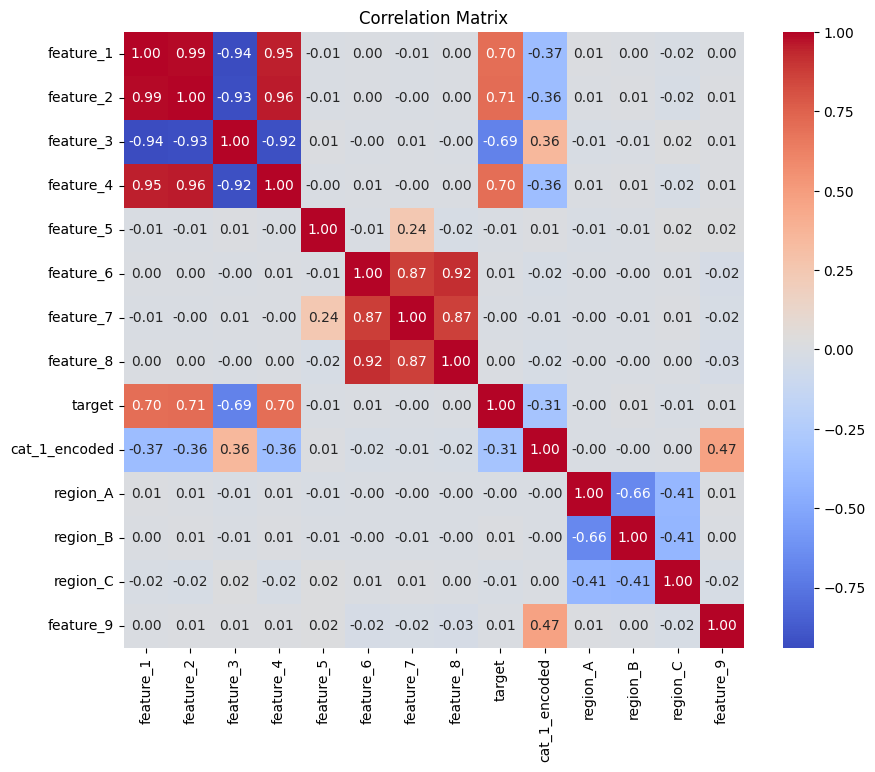

In [ ]:
# plot heatmap that visualize the correlation matrix
correlation_matrix = df_3.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# export cleaned dataset with new features
df_3.to_csv('C:\depression analysis\Machine Learning\final project\cleaned_dataset with new features.csv')

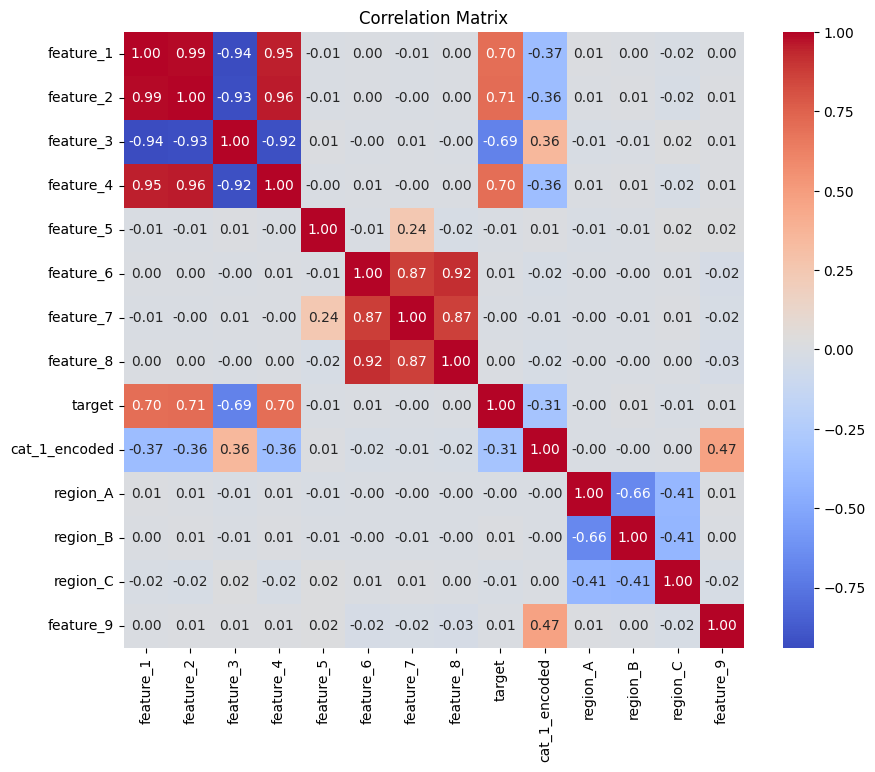

In [ ]:
# plot heatmap that visualize the correlation matrix
correlation_matrix = df_3.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
df_4 = df_3.copy()
scaler = MinMaxScaler()
for feature in df_4:
    df_4[feature] = scaler.fit_transform(df_4[[feature]])

print(df_4.head())

   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0   0.590734   0.602870   0.421387   0.575676   0.892487   0.291691   
1   0.473855   0.493050   0.501098   0.537082   0.852358   0.264397   
2   0.618523   0.625464   0.407291   0.654372   0.374936   0.684934   
3   0.779645   0.740199   0.200304   0.738960   0.941135   0.825531   
4   0.456204   0.453284   0.570710   0.461068   0.805315   0.520221   

   feature_7  feature_8  target  cat_1_encoded  region_A  region_B  region_C  \
0   0.266829   0.294740     1.0       0.000000       0.0       0.0       1.0   
1   0.259961   0.321959     0.0       0.333333       1.0       0.0       0.0   
2   0.704035   0.634662     1.0       0.666667       0.0       0.0       1.0   
3   0.867424   0.807579     1.0       0.666667       0.0       1.0       0.0   
4   0.659358   0.461786     0.0       0.333333       0.0       0.0       1.0   

   feature_9  
0   0.091154  
1   0.061612  
2   0.134728  
3   0.318937  
4   0.071630  


In [ ]:
pca = PCA(0.95)
pca_result = pca.fit_transform(df_2)
print(pca_result)

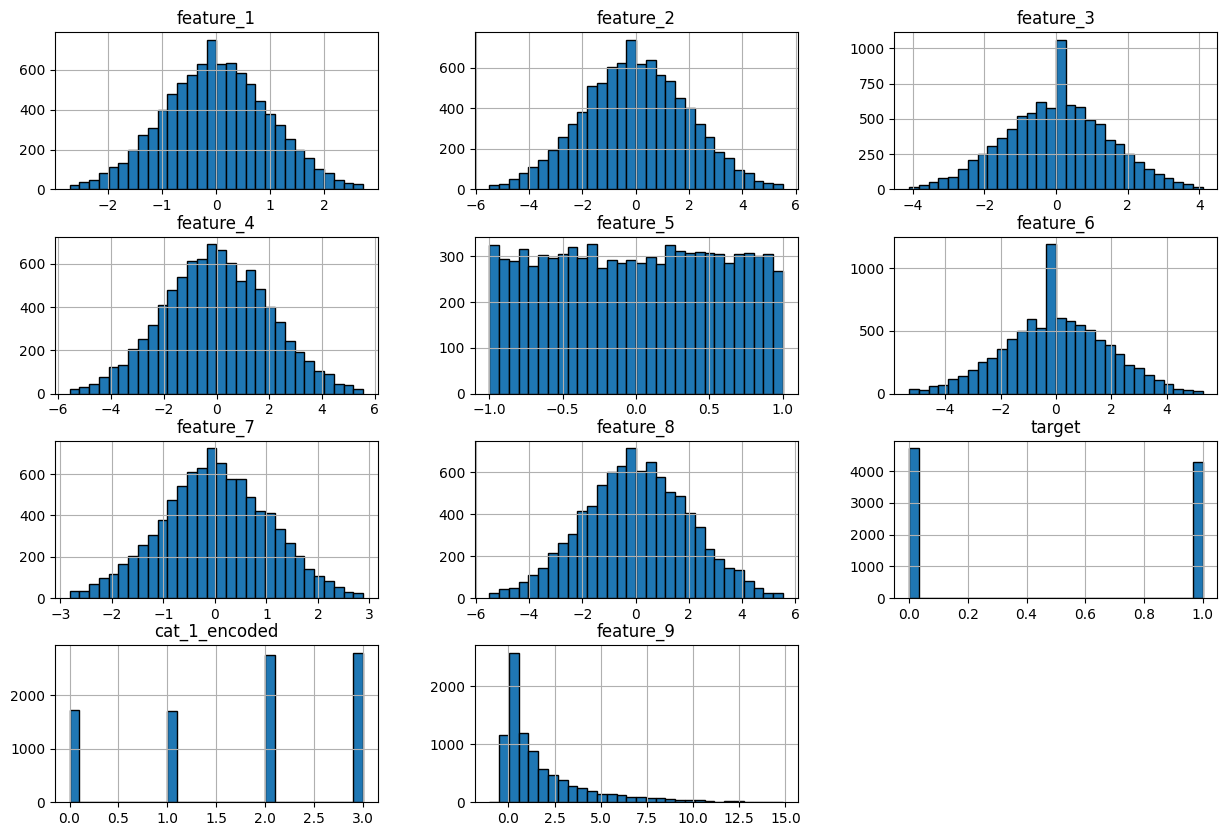

In [ ]:
df_3.hist(bins = 30, figsize=(15,10), edgecolor = 'black')
plt.show()

# V. **MODELING**

In [ ]:
X = df_4.drop('target', axis=1)
y = df_4['target']


In [ ]:
X.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,cat_1_encoded,region_A,region_B,region_C,feature_9
0,0.590734,0.602870,0.421387,0.575676,0.892487,0.291691,0.266829,0.294740,0.000000,0.0,0.0,1.0,0.091154
1,0.473855,0.493050,0.501098,0.537082,0.852358,0.264397,0.259961,0.321959,0.333333,1.0,0.0,0.0,0.061612
2,0.618523,0.625464,0.407291,0.654372,0.374936,0.684934,0.704035,0.634662,0.666667,0.0,0.0,1.0,0.134728
3,0.779645,0.740199,0.200304,0.738960,0.941135,0.825531,0.867424,0.807579,0.666667,0.0,1.0,0.0,0.318937
4,0.456204,0.453284,0.570710,0.461068,0.805315,0.520221,0.659358,0.461786,0.333333,0.0,0.0,1.0,0.071630


In [ ]:
y.head()

,target
0,1.0
1,0.0
2,1.0
3,1.0
4,0.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
#def select_features(X, y):
    #model = RandomForestClassifier(random_state=42)
    #rfe = RFE(model, n_features_to_select=4)
    #X_final = rfe.fit_transform(X, y)
    #final_features = X.columns[rfe.get_support()]
    #print(final_features)
    #return final_features

In [ ]:
#selected_features = select_features(X_train, y_train)
#X_test = X_test[selected_features]
#X_train = X_train[selected_features]

print(len(X_train))
print(len(X_test))

7200
1800


In [ ]:
#def evaluate_model(model, param_grid, X_train, y_train, X_test, y_test):

    # GridSearchCV for hyperparameter tuning
    #grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
    #grid_search.fit(X_train, y_train)

    # Training the model with the best parameters
    #best_model = grid_search.best_estimator_

    # Predictions
    #predictions = best_model.predict(X_test)

    # Best parameters
    #best_parameters = grid_search.best_params_
    #print("Best Parameters:", best_parameters)

    #print("Classification Report:")
    #print(classification_report(y_test, predictions))

    # Evaluation
    #conf_matrix = confusion_matrix(y_test, predictions)

    # visualization of Confusion Matrix
    #plt.figure(figsize=(6, 4))
    #sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap="YlGnBu", fmt='g')
    #plt.title('Confusion matrix')
    #plt.ylabel('Actual label')
    #plt.xlabel('Predicted label')
    #plt.show()

    # ROC curve and AUC
    #y_probs = best_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (class 1)
    #fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    #roc_auc = auc(fpr, tpr)

    #plt.figure(figsize=(8, 6))
    #plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    #plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') #Dashed line represents random guessing
    #plt.xlim([0.0, 1.0])
    #plt.ylim([0.0, 1.05])
    #plt.xlabel('False Positive Rate')
    #plt.ylabel('True Positive Rate')
    #plt.title('Receiver Operating Characteristic (ROC)')
    #plt.legend(loc="lower right")
    #plt.show()

    #print(f"Random Forest AUC: {roc_auc}")

    # cross validation
    #kfold = KFold(n_splits=5, shuffle=True, random_state=42)  # Or StratifiedKFold for classification
    #kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    #cv_scores = cross_val_score(best_model, X_train, y_train, cv=kfold, scoring='accuracy')  # Use X_train!

    #print("\nCross-validation scores (using cross_val_score):", cv_scores)
    #print("Mean cross-validation score:", cv_scores.mean())
    #print("Standard deviation of scores:", cv_scores.std())

    #plt.figure(figsize=(8, 6))
    #sns.boxplot(y=cv_scores)  # Create a box plot
    #plt.title("Cross-Validation Scores")
    #plt.ylabel("Accuracy")  # Or your chosen metric
    #plt.show()

    #return best_model

In [ ]:
# Check overfitting
#def check_overfitting(model, X_train, y_train, X_test, y_test):
    #train_accuracy = model.score(X_train, y_train)
    #test_accuracy = model.score(X_test, y_test)
    #print(f"Training Accuracy: {train_accuracy:.4f}")
    #print(f"Testing Accuracy: {test_accuracy:.4f}")

In [ ]:
#def feature_importance(model, selected_features):
    # Feature importances from Random Forest
    #importances = model.feature_importances_
    #feature_names = X[selected_features].columns
    #feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
    #print(feature_importance_df.sort_values(by='importance', ascending=False))

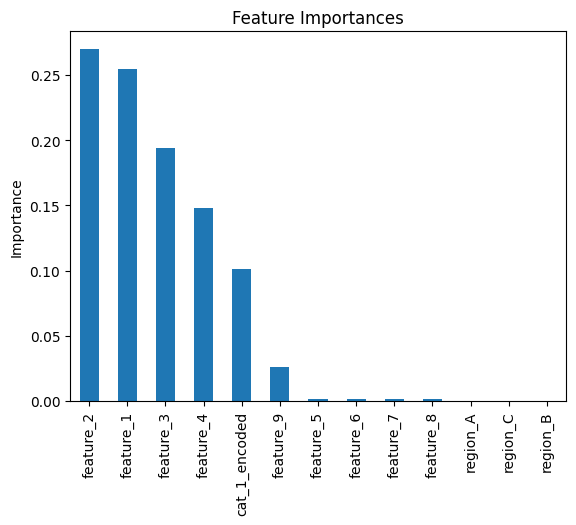

              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88       947
         1.0       0.89      0.84      0.87       853

    accuracy                           0.88      1800
   macro avg       0.88      0.87      0.87      1800
weighted avg       0.88      0.88      0.88      1800

[[857  90]
 [134 719]]
0.8755555555555555


In [ ]:
# Random Forest
rf_default = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42)
rf_default.fit(X_train, y_train)

y_pred_rf = rf_default.predict(X_test)

#feature importance
feature_importances = rf_default.feature_importances_
forest_importances = pd.Series(feature_importances, index=X_train.columns)
forest_importances.sort_values(ascending=False, inplace=True)
forest_importances.plot(kind='bar', title='Feature Importances')
plt.ylabel('Importance')
plt.show()


print(classification_report(y_test, y_pred_rf))
#print(feature_importances)
print(confusion_matrix(y_test, y_pred_rf))
print(accuracy_score(y_test, y_pred_rf))





# confusion matrix
#cm_default = confusion_matrix(y_test, y_test_pred)
#plt.figure(figsize=(8, 6))
#sns.heatmap(cm_default, annot=True, fmt="d", cmap="Blues", cbar=False,
            #xticklabels=np.unique(y), yticklabels=np.unique(y)) # xticklabels and yticklabels added
#plt.xlabel("Predicted Label")
#plt.ylabel("True Label")
#plt.title("Confusion Matrix")
#plt.show()

# ROC curve and AUC
#y_probs = rf_default.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (class 1)
#fpr, tpr, thresholds = roc_curve(y_test, y_probs)
#roc_auc = auc(fpr, tpr)

#plt.figure(figsize=(8, 6))
#plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
#plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') #Dashed line represents random guessing
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
#plt.title('Receiver Operating Characteristic (ROC)')
#plt.legend(loc="lower right")
#plt.show()
#print(f"Random Forest AUC: {roc_auc}")

# cross validation
#kfold = KFold(n_splits=5, shuffle=True, random_state=42)  # Or StratifiedKFold for classification
#kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#cv_scores = cross_val_score(rf_default, X_train, y_train, cv=kfold, scoring='accuracy')  # Use X_train only hehe

#print("\nCross-validation scores (using cross_val_score):", cv_scores)
#print("Mean cross-validation score:", cv_scores.mean())
#print("Standard deviation of scores:", cv_scores.std())

#lt.figure(figsize=(8, 6))
#sns.boxplot(y=cv_scores)  # create a box plot
#plt.title("Cross-Validation Scores")
#plt.ylabel("Accuracy")
#plt.show()

#explainer = shap.Explainer(rf_default, X_train)
#shap_values = explainer.shap_values(X_train)
#shap.summary_plot(shap_values, X_train)

#explainer = shap.Explainer(rf_default, X_test)
#shap_values = explainer.shap_values(X_test)
#shap.summary_plot(shap_values, X_test)
#shap.summary_plot(shap_values[0], X_test)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88       947
         1.0       0.88      0.84      0.86       853

    accuracy                           0.87      1800
   macro avg       0.87      0.87      0.87      1800
weighted avg       0.87      0.87      0.87      1800



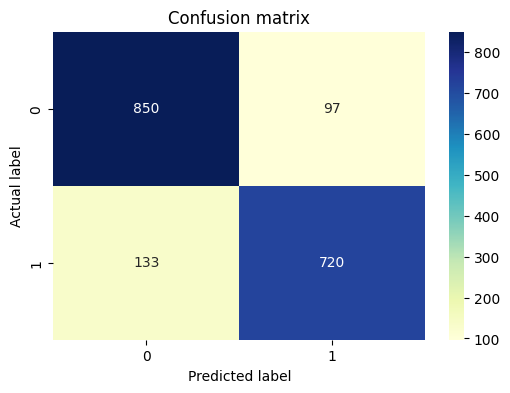

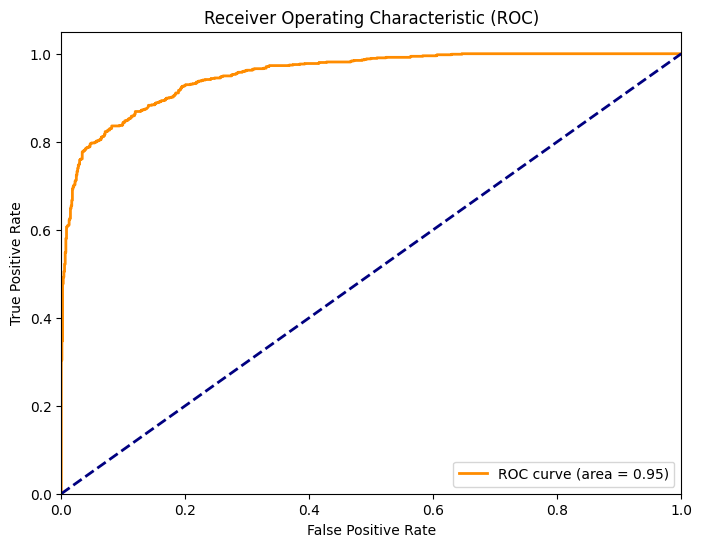

Random Forest AUC: 0.9527711994810539

Cross-validation scores (using cross_val_score): [0.87152778 0.86805556 0.87708333 0.89166667 0.88541667]
Mean cross-validation score: 0.8787499999999999
Standard deviation of scores: 0.008724610430299675


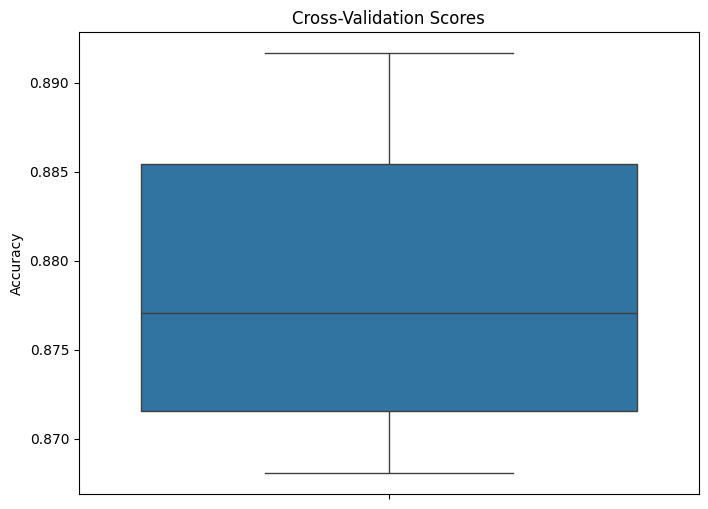

Training Accuracy: 0.9328
Testing Accuracy: 0.8722
     feature  importance
1  feature_2    0.334873
3  feature_9    0.280410
0  feature_1    0.238224
2  feature_3    0.146493


In [ ]:
# Random Forest With Hyperparameter Tuning
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf = evaluate_model(RandomForestClassifier(random_state=42), rf_param_grid, X_train, y_train, X_test, y_test)
check_overfitting(rf, X_train, y_train, X_test, y_test)
feature_importance(rf, selected_features)

Training Accuracy: 0.9979166666666667
Testing Accuracy: 0.8294444444444444


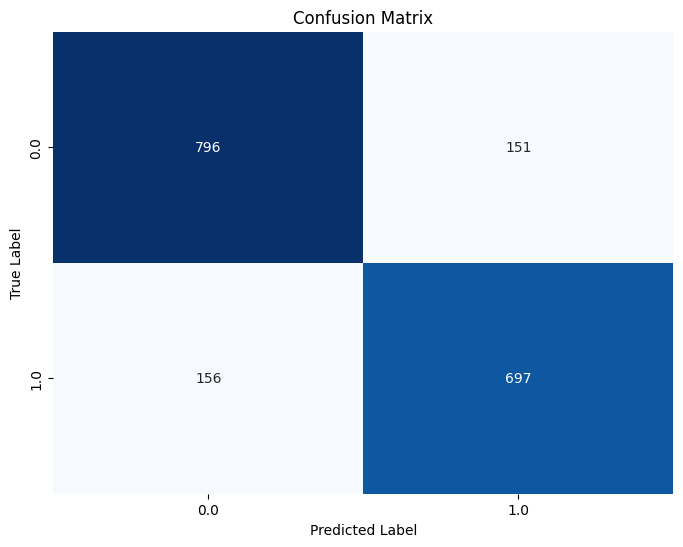

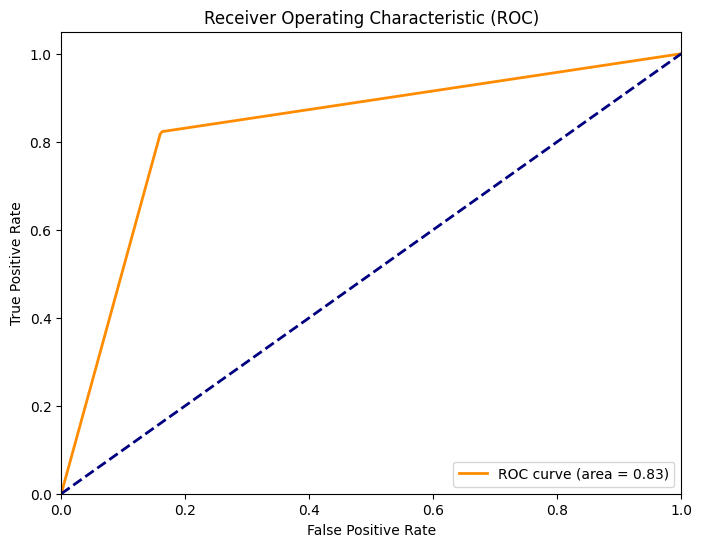

Decision Tree AUC: 0.8310064113118367

Cross-validation scores (using cross_val_score): [0.84027778 0.83541667 0.82708333 0.85277778 0.85138889]
Mean cross-validation score: 0.841388888888889
Standard deviation of scores: 0.009708323398500716


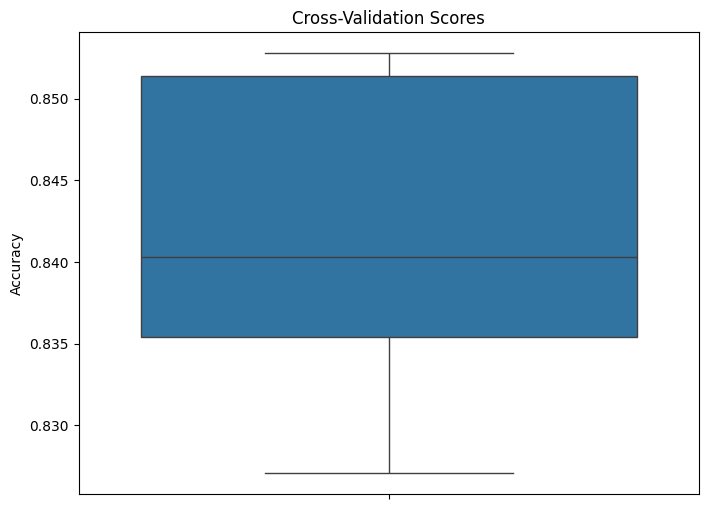

In [ ]:
# Decision Tree
dt_default = DecisionTreeClassifier(random_state=42)
dt_default.fit(X_train, y_train)

y_train_pred = dt_default.predict(X_train)

y_test_pred = dt_default.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

# confusion matrix
cm_default = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_default, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=np.unique(y), yticklabels=np.unique(y)) # xticklabels and yticklabels added
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# ROC curve and AUC
y_probs = dt_default.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (class 1)
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') #Dashed line represents random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
print(f"Decision Tree AUC: {roc_auc}")

# cross validation
#kfold = KFold(n_splits=5, shuffle=True, random_state=42)  # Or StratifiedKFold for classification
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) #Use this for imbalanced dataset

cv_scores = cross_val_score(dt_default, X_train, y_train, cv=kfold, scoring='accuracy')  # Use X_train!

print("\nCross-validation scores (using cross_val_score):", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())
print("Standard deviation of scores:", cv_scores.std())

plt.figure(figsize=(8, 6))
sns.boxplot(y=cv_scores)  # Create a box plot
plt.title("Cross-Validation Scores")
plt.ylabel("Accuracy")  # Or your chosen metric
plt.show()

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.88      0.86       947
         1.0       0.86      0.82      0.84       853

    accuracy                           0.85      1800
   macro avg       0.86      0.85      0.85      1800
weighted avg       0.85      0.85      0.85      1800



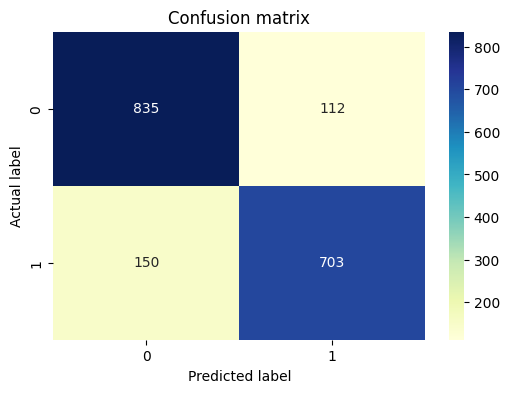

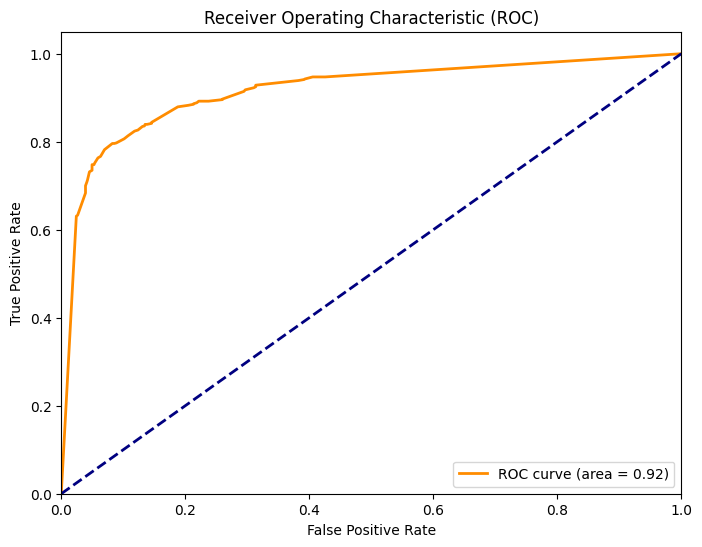

Random Forest AUC: 0.9156966344017203

Cross-validation scores (using cross_val_score): [0.84236111 0.86180556 0.85347222 0.86111111 0.87291667]
Mean cross-validation score: 0.8583333333333332
Standard deviation of scores: 0.010111263735111842


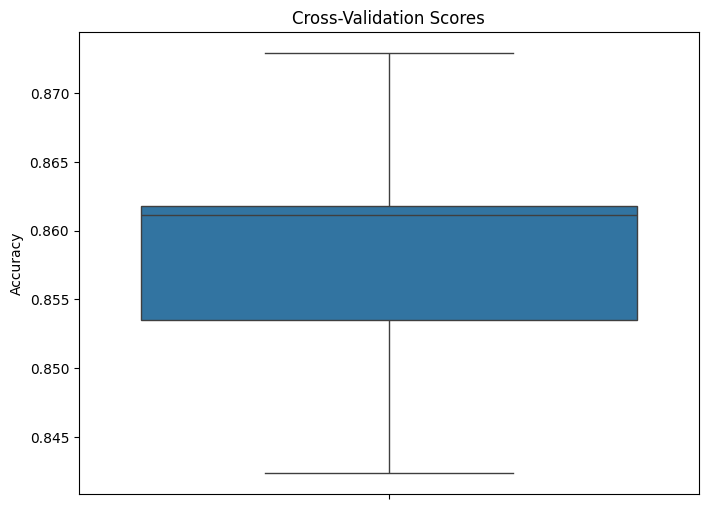

Training Accuracy: 0.9126
Testing Accuracy: 0.8544
     feature  importance
1  feature_2    0.723198
2  feature_3    0.157485
0  feature_1    0.065602
3  feature_9    0.053715


In [ ]:
# Decision Tree With Hyperparameter Tuning
dt_param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
}
dt = evaluate_model(DecisionTreeClassifier(random_state=42), dt_param_grid, X_train, y_train, X_test, y_test)
check_overfitting(dt, X_train, y_train, X_test, y_test)
feature_importance(dt, selected_features)


Accuracy on training set: 0.9373611111111111
Accuracy on test set: 0.8627777777777778


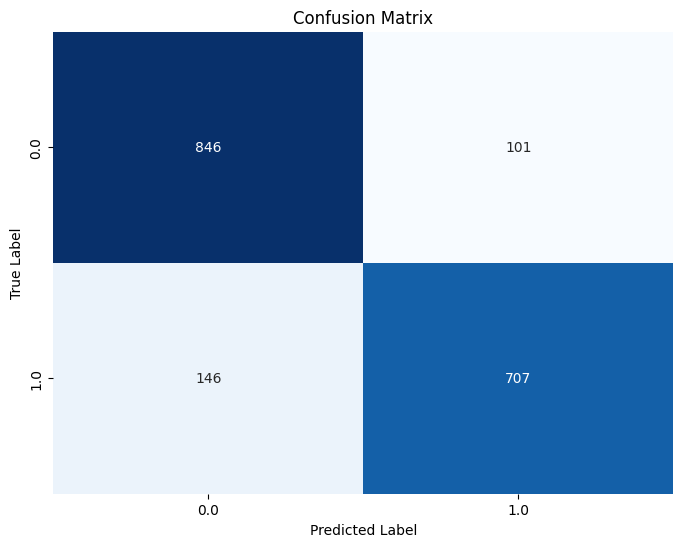

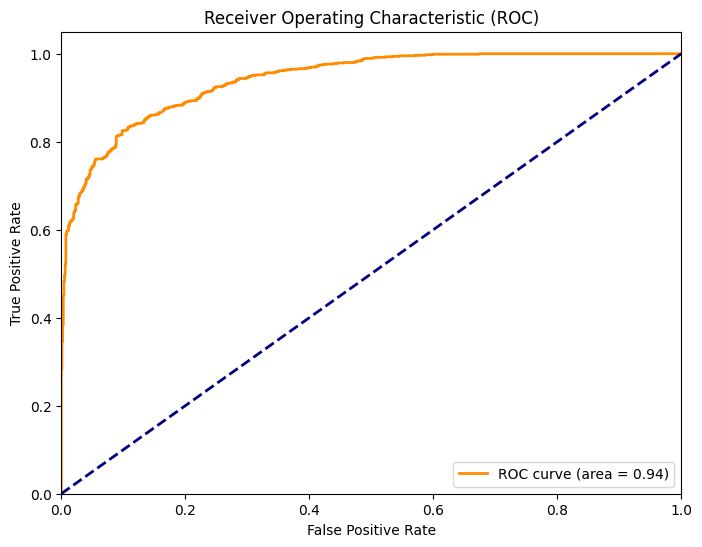

Voting Classifier AUC: 0.9415678065242123

Cross-validation scores (using cross_val_score): [0.85486111 0.8625     0.85347222 0.88333333 0.87083333]
Mean cross-validation score: 0.865
Standard deviation of scores: 0.011064136814808022


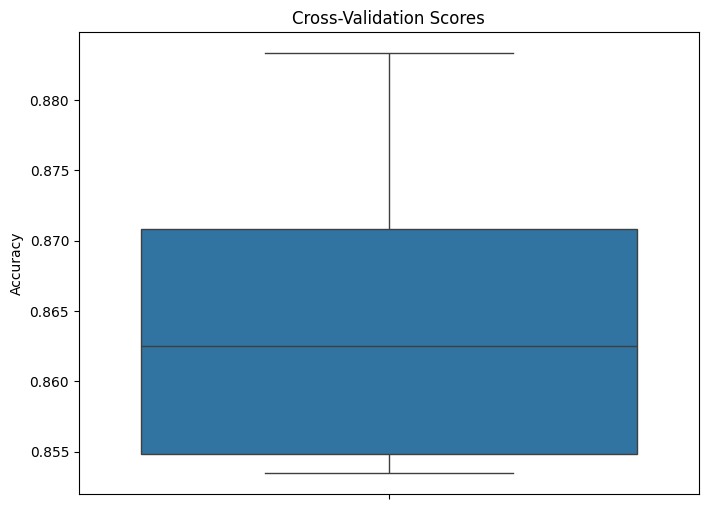

In [ ]:
# Voting Classifier
clf_1 = LogisticRegression(random_state=1)
clf_2 = DecisionTreeClassifier(random_state=1)
clf_3 = SVC(probability = True, random_state=1)

# train the classifiers
clf_1.fit(X_train, y_train)
clf_2.fit(X_train, y_train)
clf_3.fit(X_train, y_train)

# create and train
v_clf = VotingClassifier(estimators=[('lr', clf_1), ('dt', clf_2), ('svc', clf_3)], voting='soft')
v_clf = v_clf.fit(X_train, y_train)

y_train_pred_soft = v_clf.predict(X_train)
accuracy_train_soft = accuracy_score(y_train, y_train_pred_soft)
print(f'Accuracy on training set: {accuracy_train_soft}')

y_pred_soft = v_clf.predict(X_test)
accuracy_test_soft = accuracy_score(y_test, y_pred_soft)
print(f'Accuracy on test set: {accuracy_test_soft}')

# confusion matrix
cm_default = confusion_matrix(y_test, y_pred_soft)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_default, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=np.unique(y), yticklabels=np.unique(y)) # xticklabels and yticklabels added
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# ROC curve and AUC
y_probs = v_clf.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (class 1)
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') #Dashed line represents random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
print(f"Voting Classifier AUC: {roc_auc}")

# cross validation
#kfold = KFold(n_splits=5, shuffle=True, random_state=42)  # Or StratifiedKFold for classification
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) #Use this for imbalanced dataset

cv_scores = cross_val_score(v_clf, X_train, y_train, cv=kfold, scoring='accuracy')  # Use X_train!

print("\nCross-validation scores (using cross_val_score):", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())
print("Standard deviation of scores:", cv_scores.std())

plt.figure(figsize=(8, 6))
sns.boxplot(y=cv_scores)  # Create a box plot
plt.title("Cross-Validation Scores")
plt.ylabel("Accuracy")  # Or your chosen metric
plt.show()

Best Parameters: {'dt__max_depth': 5, 'lr__C': 1, 'svc__C': 10, 'voting': 'soft', 'weights': (1, 2, 1)}
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.91      0.89       947
         1.0       0.90      0.83      0.86       853

    accuracy                           0.88      1800
   macro avg       0.88      0.87      0.87      1800
weighted avg       0.88      0.88      0.88      1800



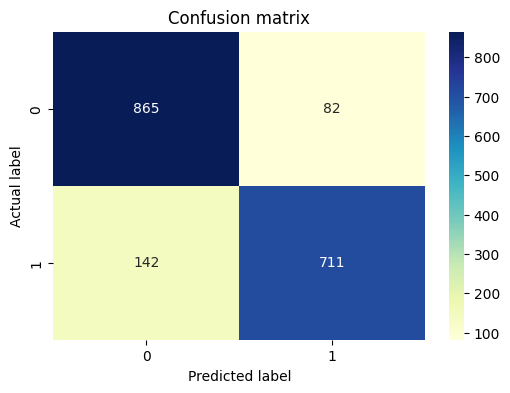

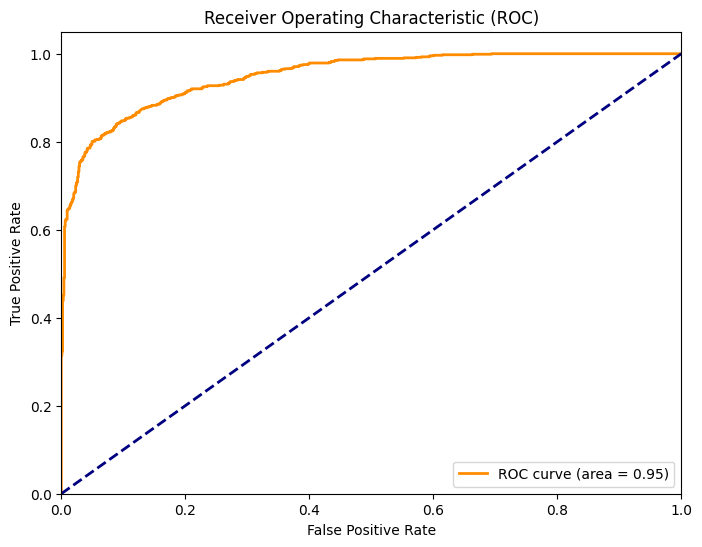

Random Forest AUC: 0.9499499251662868

Cross-validation scores (using cross_val_score): [0.875      0.86458333 0.88055556 0.89166667 0.88263889]
Mean cross-validation score: 0.8788888888888889
Standard deviation of scores: 0.008942977795558473


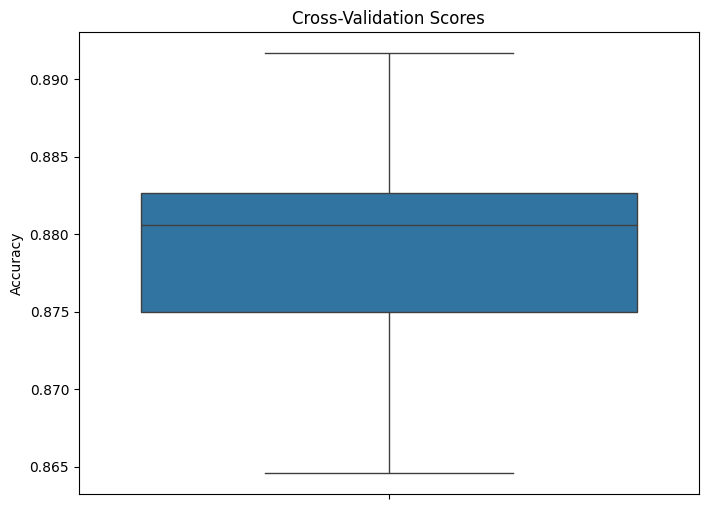

Training Accuracy: 0.8878
Testing Accuracy: 0.8756


In [ ]:
# Voting Classifier With Hyperparameter Tuning
param_grid = {
    'lr__C': [0.1, 1, 10],  # Tune C for Logistic Regression
    'dt__max_depth': [None, 5, 10],  # Tune max_depth for Decision Tree
    'svc__C': [0.1, 1, 10],  # Tune C for SVC
    'voting': ['soft'],  # Tune voting strategy
    'weights': [(1, 1, 1), (2, 1, 1), (1, 2, 1), (1, 1, 2)]  # Tune weights
}
clf_1 = LogisticRegression(random_state=1)
clf_2 = DecisionTreeClassifier(random_state=1)
clf_3 = SVC(probability=True, random_state=1)

vc = VotingClassifier(estimators=[('lr', clf_1), ('dt', clf_2), ('svc', clf_3)], voting='soft')

best_vc = evaluate_model(vc, param_grid, X_train, y_train, X_test, y_test)
check_overfitting(best_vc, X_train, y_train, X_test, y_test)
#feature_importance(best_vc, selected_features)

Accuracy with soft voting on training set: 0.89375
Accuracy with soft voting on test set: 0.8744444444444445


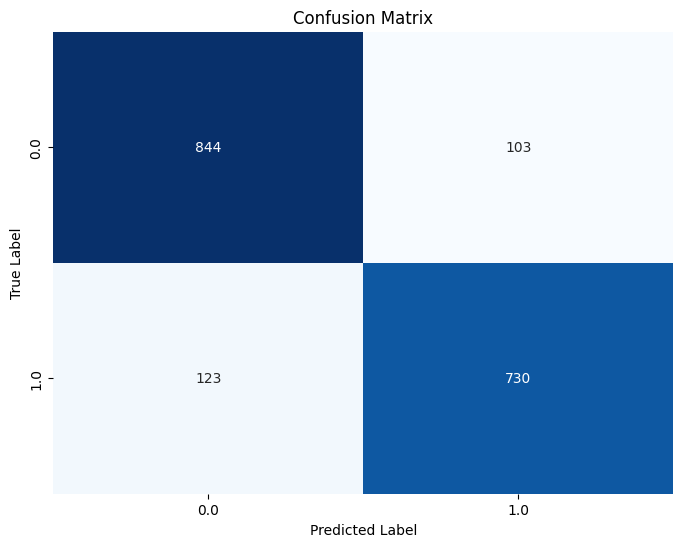

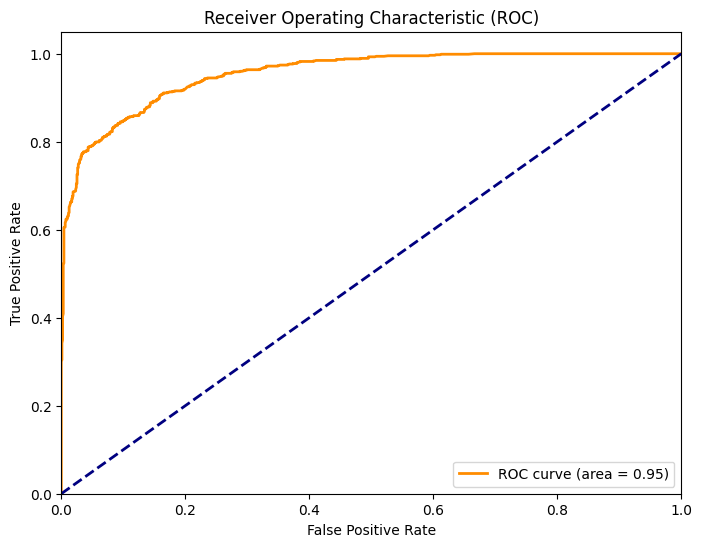

Random Forest AUC: 0.9542771583243684

Cross-validation scores (using cross_val_score): [0.87708333 0.87916667 0.875      0.89097222 0.88333333]
Mean cross-validation score: 0.881111111111111
Standard deviation of scores: 0.005648527613239673


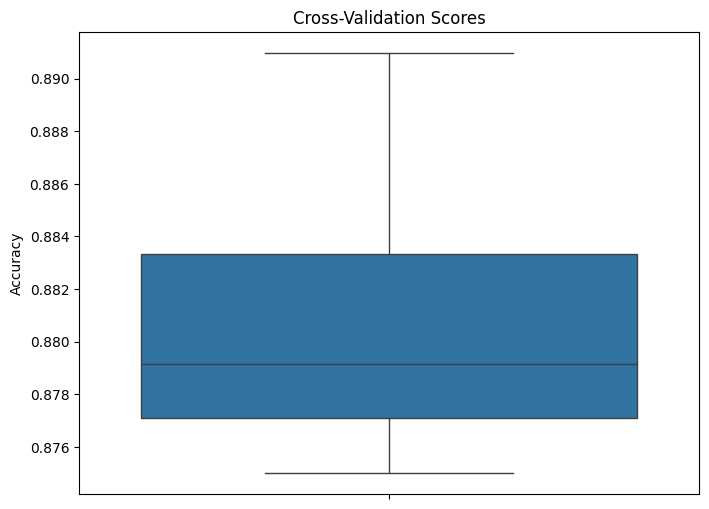

In [ ]:
# Gradient Boosting
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42) #Adjust parameters
gb_clf.fit(X_train, y_train)

y_train_pred_soft = gb_clf.predict(X_train)
accuracy_train_soft = accuracy_score(y_train, y_train_pred_soft)
print(f'Accuracy with soft voting on training set: {accuracy_train_soft}')

y_pred_soft = gb_clf.predict(X_test)
accuracy_test_soft = accuracy_score(y_test, y_pred_soft)
print(f'Accuracy with soft voting on test set: {accuracy_test_soft}')

# confusion matrix
cm_default = confusion_matrix(y_test, y_pred_soft)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_default, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=np.unique(y), yticklabels=np.unique(y)) # xticklabels and yticklabels added
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# ROC curve and AUC
y_probs = gb_clf.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (class 1)
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') #Dashed line represents random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
print(f"Random Forest AUC: {roc_auc}")

# cross validation
#kfold = KFold(n_splits=5, shuffle=True, random_state=42)  # Or StratifiedKFold for classification
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(gb_clf, X_train, y_train, cv=kfold, scoring='accuracy')  # Use X_train

print("\nCross-validation scores (using cross_val_score):", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())
print("Standard deviation of scores:", cv_scores.std())

plt.figure(figsize=(8, 6))
sns.boxplot(y=cv_scores)  # Create a box plot
plt.title("Cross-Validation Scores")
plt.ylabel("Accuracy")  # Or your chosen metric
plt.show()

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88       947
         1.0       0.88      0.84      0.86       853

    accuracy                           0.87      1800
   macro avg       0.87      0.87      0.87      1800
weighted avg       0.87      0.87      0.87      1800



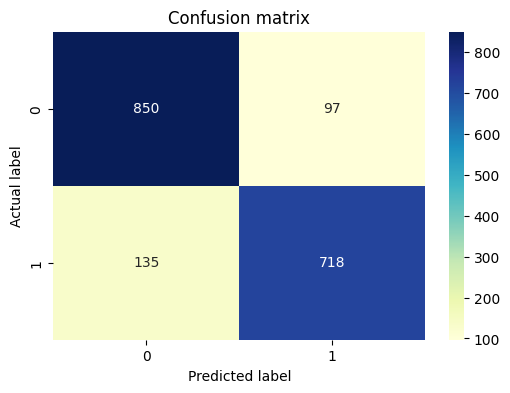

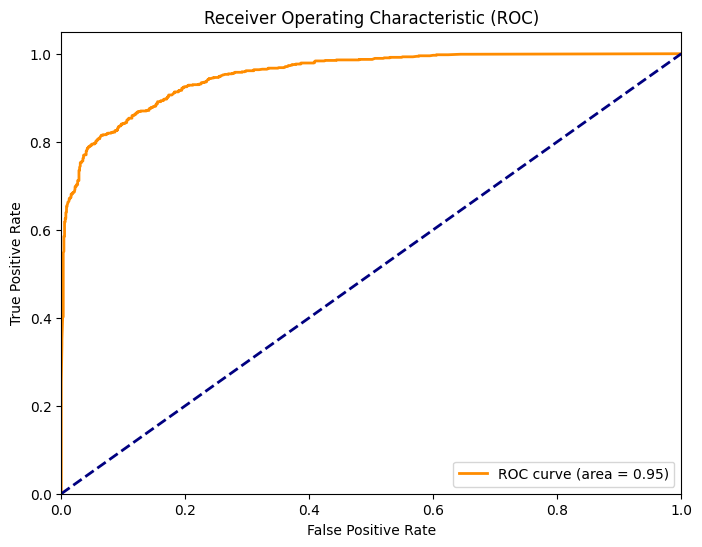

Random Forest AUC: 0.9527093022823974

Cross-validation scores (using cross_val_score): [0.87569444 0.87916667 0.88055556 0.90347222 0.88055556]
Mean cross-validation score: 0.8838888888888888
Standard deviation of scores: 0.009951657843151595


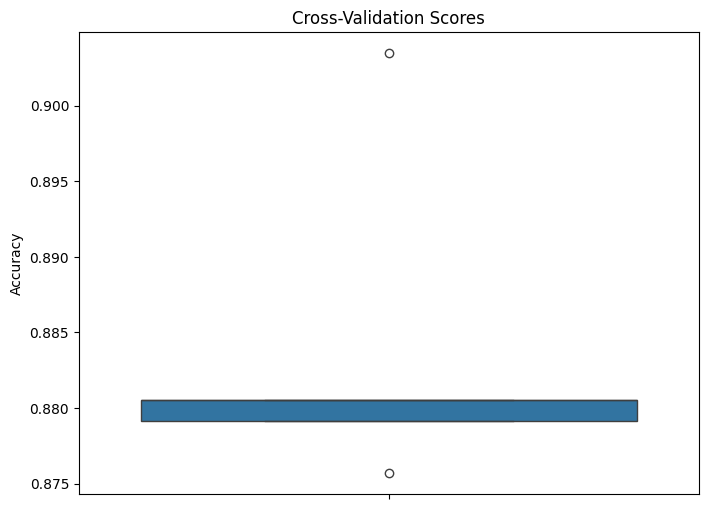

Training Accuracy: 0.8911
Testing Accuracy: 0.8711


In [ ]:
#Gradient Boosting With Hypermeter Tuning
param_grid = {  # Your hyperparameter grid
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 4, 5],
    'subsample': [0.7, 0.8, 0.9]
}
gb = GradientBoostingClassifier(random_state=42)
best_gb = evaluate_model(gb, param_grid, X_train, y_train, X_test, y_test)
check_overfitting(best_gb, X_train, y_train, X_test, y_test)


In [4]:
# Default Models Comparison
models = ['Random Forest', 'Decision Tree', 'Voting Classifier', 'Gradient Boosting']

train_accuracies = [rf_default.score(X_train, y_train), dt_default.score(X_train, y_train), v_clf.score(X_train, y_train), gb_clf.score(X_train, y_train)]
test_accuracies = [rf_default.score(X_test, y_test), dt_default.score(X_test, y_test), v_clf.score(X_test, y_test), gb_clf.score(X_test, y_test)]

x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, train_accuracies, width, label='Train', color=plt.cm.viridis(np.linspace(0, 0.5, len(models)))) # Lighter shades for train
rects2 = ax.bar(x + width/2, test_accuracies, width, label='Test', color=plt.cm.viridis(np.linspace(0.5, 1, len(models))))  # Darker shades for test


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Default Models Accuracies')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
ax.set_ylim(0, 1)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height(s)."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height.round(2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


NameError: name 'rf_default' is not defined

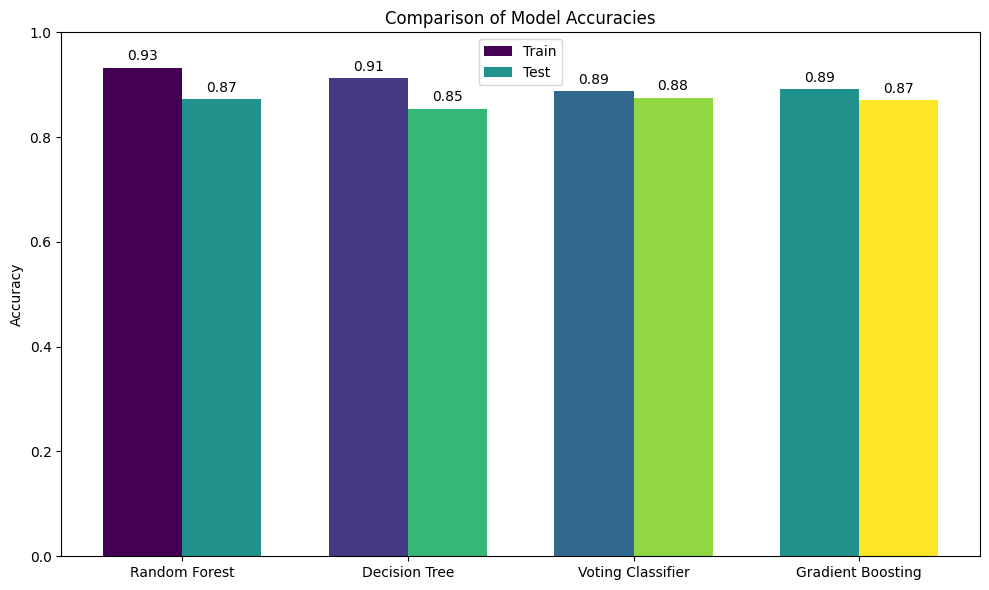

In [ ]:
# Models With Hyperparameter Tuning Comparison
models = ['Random Forest', 'Decision Tree', 'Voting Classifier', 'Gradient Boosting']

train_accuracies = [rf.score(X_train, y_train), dt.score(X_train, y_train), best_vc.score(X_train, y_train), best_gb.score(X_train, y_train)]
test_accuracies = [rf.score(X_test, y_test), dt.score(X_test, y_test), best_vc.score(X_test, y_test), best_gb.score(X_test, y_test)]

x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, train_accuracies, width, label='Train', color=plt.cm.viridis(np.linspace(0, 0.5, len(models)))) # Lighter shades for train
rects2 = ax.bar(x + width/2, test_accuracies, width, label='Test', color=plt.cm.viridis(np.linspace(0.5, 1, len(models))))  # Darker shades for test


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Model Accuracies')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
ax.set_ylim(0, 1)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height(s)."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height.round(2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()
